# Prediction of Photovoltaic Power Output

This Jupyter Notebook serves as a platform for data exploration, analysis, and visualization. It provides an interactive environment to experiment with code and explore various data-related tasks.

#### Notebook Purpose:
The purpose of this notebook is to improve the predictions Photovoltaic Power Output by using various different data sources.

#### Dataset:
The analysis in this notebook is performed using multiple data sources. These sources provide the necessary information for predicting the power output based on various factors. The dataset used in this analysis consists of the following:

1. Weather Data: Weather data from different sources in Germany is utilized to gather additional information such as longitude, latitude, altitude, wind speed, temperature, humidity, and visibility for various locations. This data is crucial for predicting the power output, as weather conditions significantly impact solar energy generation.
2. Power Output Dataset: A labeled dataset is used to train a machine learning model. This dataset contains labeled examples that associate specific weather input features with their corresponding power output values. The model will learn from this dataset to make predictions on unseen data.


By combining these diverse datasets, this analysis aims to explore the relationship between solar panel installations, weather conditions, and the resulting power output.




# Step 1: Exploring Weather Data of the CDC

These are the units used for the different variables in the training and test data:

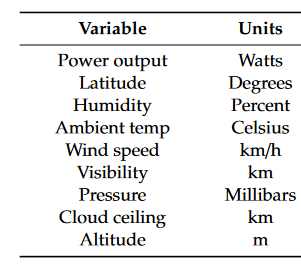

That is how we have to format and convert the weather data.

## Station Descriptions (latitude & altitude)
This data sets provides the location (latitude and longitude) as well as the altitude of the stations.

### Loading Data

In [ ]:
# Authentifizierung in Google Colab
from google.colab import auth
auth.authenticate_user()


In [ ]:
%%bigquery df_station_description --project solarinsight-383513
SELECT
*
FROM
  `solarinsight-383513.cdc_data.all_station_descriptions`

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
df_station_description.head()

,STATIONS_ID,von_datum_,bis_datum_,Altitude,geoBreite,geoLaenge,Stationsname_,Bundesland
0,125,19710104,20230606,742,478342,108667,Altenstadt,Bayern
1,125,19930301,20230606,742,478342,108667,Altenstadt,Bayern
2,125,19740301,20230531,742,478342,108667,Altenstadt,Bayern
3,126,19791101,20101130,330,495447,102213,Uffenheim (Schulstr.),Bayern
4,142,19820101,20230606,511,484060,113117,Altomünster-Maisbrunn,Bayern


In [ ]:
df_station_description.describe()

,STATIONS_ID,von_datum_,bis_datum_,Altitude,geoBreite,geoLaenge
count,1790.00,1790.00,1790.00,1790.00,1790.00,1790.00
mean,3774.83,19877292.37,20140092.64,294.09,508135.33,100427.73
std,3077.12,207393.38,134825.63,289.60,20161.70,21100.27
min,3.00,18930101.00,19500630.00,0.00,473984.00,60244.00
25%,1572.00,19750101.00,20111231.00,62.00,491315.75,83615.50
50%,3271.00,19930760.00,20230606.00,237.00,507303.00,99232.00
75%,5229.00,20041201.00,20230606.00,450.00,523613.00,116262.50
max,19582.00,20230501.00,20230606.00,2956.00,550110.00,149506.00


### Pre-Processing Data

#### Converting Datatypes

In [ ]:
df_station_description.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1790 entries, 0 to 1789
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   STATIONS_ID    1790 non-null   Int64 
 1   von_datum_     1790 non-null   Int64 
 2   bis_datum_     1790 non-null   Int64 
 3   Altitude       1790 non-null   Int64 
 4   geoBreite      1790 non-null   Int64 
 5   geoLaenge      1790 non-null   Int64 
 6   Stationsname_  1790 non-null   object
 7   Bundesland     1790 non-null   object
dtypes: Int64(6), object(2)
memory usage: 122.5+ KB


In [ ]:
# Convert columns
df_station_description['geoBreite'] = df_station_description['geoBreite'].astype(float)
df_station_description['geoLaenge'] = df_station_description['geoLaenge'].astype(float)
df_station_description['Stationsname_'] = df_station_description['Stationsname_'].astype(str)
df_station_description['STATIONS_ID'] = df_station_description['STATIONS_ID'].astype(int)
df_station_description['von_datum_'] = df_station_description['von_datum_'].astype(int)
df_station_description['bis_datum_'] = df_station_description['bis_datum_'].astype(int)



#### Correct Error in Latitude and Longitude

In [ ]:
# Divide entries based on number of figures because of errors in the data input
df_station_description['geoBreite'] = df_station_description['geoBreite'].apply(lambda x: x / 10000)
df_station_description['geoLaenge'] = df_station_description['geoLaenge'].apply(lambda x: x / 10000)
df_station_description

,STATIONS_ID,von_datum_,bis_datum_,Altitude,geoBreite,geoLaenge,Stationsname_,Bundesland
0,125,19710104,20230606,742,47.83,10.87,Altenstadt,Bayern
1,125,19930301,20230606,742,47.83,10.87,Altenstadt,Bayern
2,125,19740301,20230531,742,47.83,10.87,Altenstadt,Bayern
3,126,19791101,20101130,330,49.54,10.22,Uffenheim (Schulstr.),Bayern
4,142,19820101,20230606,511,48.41,11.31,Altomünster-Maisbrunn,Bayern
...,...,...,...,...,...,...,...,...
1785,5046,20080301,20230606,501,49.86,12.35,Tirschenreuth-Lodermühl,Bayern
1786,5046,20080301,20111231,501,49.86,12.35,Tirschenreuth-Lodermühl,Bayern
1787,4464,19890801,20230606,501,50.57,11.80,Schleiz,Thüringen
1788,4464,19900612,20230606,501,50.57,11.80,Schleiz,Thüringen


#### Refactor Columns


In [ ]:
# drop
df_station_description = df_station_description.drop('Bundesland', axis=1)

df_station_description.head()

,STATIONS_ID,von_datum_,bis_datum_,Altitude,geoBreite,geoLaenge,Stationsname_
0,125,19710104,20230606,742,47.83,10.87,Altenstadt
1,125,19930301,20230606,742,47.83,10.87,Altenstadt
2,125,19740301,20230531,742,47.83,10.87,Altenstadt
3,126,19791101,20101130,330,49.54,10.22,Uffenheim (Schulstr.)
4,142,19820101,20230606,511,48.41,11.31,Altomünster-Maisbrunn


In [ ]:
# rename columns
df_station_description.rename(columns={'STATIONS_ID': 'StationId'}, inplace=True)
df_station_description.rename(columns={'Stationsname_': 'StationName'}, inplace=True)
df_station_description.rename(columns={'von_datum_': 'StartDate'}, inplace=True)
df_station_description.rename(columns={'bis_datum_': 'EndDate'}, inplace=True)
df_station_description.rename(columns={'geoBreite': 'Latitude'}, inplace=True)
df_station_description.rename(columns={'geoLaenge': 'Longitude'}, inplace=True)



In [ ]:
df_station_description.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1790 entries, 0 to 1789
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   StationId    1790 non-null   int64  
 1   StartDate    1790 non-null   int64  
 2   EndDate      1790 non-null   int64  
 3   Altitude     1790 non-null   Int64  
 4   Latitude     1790 non-null   float64
 5   Longitude    1790 non-null   float64
 6   StationName  1790 non-null   object 
dtypes: Int64(1), float64(2), int64(3), object(1)
memory usage: 99.8+ KB


In [ ]:
df_station_description_sorted = df_station_description.sort_values('StationId')
df_station_description_sorted

,StationId,StartDate,EndDate,Altitude,Latitude,Longitude,StationName
1226,3,19370101,20110331,202,50.78,6.09,Aachen
1225,3,19500401,20110401,202,50.78,6.09,Aachen
1224,3,19500401,20110331,202,50.78,6.09,Aachen
1227,5,19790102,19950630,190,50.82,6.18,Aachen-Merzbrück
913,11,19800901,20200930,680,47.97,8.52,Donaueschingen (Landeplatz)
...,...,...,...,...,...,...,...
1380,19207,20230401,20230606,16,53.82,12.06,Gülzow-Prüzen
307,19317,19740101,19810630,486,48.23,11.57,Oberschleißheim/Flugplatz
1173,19580,19750701,20051031,471,48.50,9.40,"Urach, Bad/Erms"
1174,19581,19770601,20041231,600,48.67,8.47,Enzklösterle/Schwarzwald


#### Remove Duplicates
As the original station data set was a manual collection of station information from different sources of the CDC, it can not be ruled out, that some stations were duplicates

In [ ]:
# Remove duplicates based on 'StationId', 'StartDate', and 'EndDate' columns
df_station_description_unique = df_station_description_sorted.drop_duplicates(subset=['StationId', 'StartDate', 'EndDate'])

# Print the DataFrame without duplicates
df_station_description_unique


,StationId,StartDate,EndDate,Altitude,Latitude,Longitude,StationName
1226,3,19370101,20110331,202,50.78,6.09,Aachen
1225,3,19500401,20110401,202,50.78,6.09,Aachen
1224,3,19500401,20110331,202,50.78,6.09,Aachen
1227,5,19790102,19950630,190,50.82,6.18,Aachen-Merzbrück
913,11,19800901,20200930,680,47.97,8.52,Donaueschingen (Landeplatz)
...,...,...,...,...,...,...,...
1379,19207,20230401,20230606,16,53.82,12.06,Gülzow-Prüzen
307,19317,19740101,19810630,486,48.23,11.57,Oberschleißheim/Flugplatz
1173,19580,19750701,20051031,471,48.50,9.40,"Urach, Bad/Erms"
1174,19581,19770601,20041231,600,48.67,8.47,Enzklösterle/Schwarzwald


#### Filtering Stations
The original data set includes a lot off stations which are not used anymore. For our prediction, we only need current measurements. Hence, we can delete rows with unused stations.

In [ ]:
# Count the rows where 'endDate' is equal to 20230606
count = df_station_description_unique[df_station_description_unique['EndDate'] == 20230606].shape[0]

# Print the count
print("Number of rows with EndDate='20230606':", count)



Number of rows with EndDate='20230606': 858


In [ ]:
df_station_description_unique = df_station_description_unique.drop('StartDate', axis=1)
df_station_description_unique = df_station_description_unique.drop_duplicates(subset=['StationId', 'EndDate'])

df_station_description_unique

,StationId,EndDate,Altitude,Latitude,Longitude,StationName
1226,3,20110331,202,50.78,6.09,Aachen
1225,3,20110401,202,50.78,6.09,Aachen
1227,5,19950630,190,50.82,6.18,Aachen-Merzbrück
913,11,20200930,680,47.97,8.52,Donaueschingen (Landeplatz)
655,44,20111231,44,52.93,8.24,Großenkneten
...,...,...,...,...,...,...
1379,19207,20230606,16,53.82,12.06,Gülzow-Prüzen
307,19317,19810630,486,48.23,11.57,Oberschleißheim/Flugplatz
1173,19580,20051031,471,48.50,9.40,"Urach, Bad/Erms"
1174,19581,20041231,600,48.67,8.47,Enzklösterle/Schwarzwald


In [ ]:
# filter only for recent data
final_station_df = df_station_description_unique[df_station_description_unique['EndDate'] == 20230606]

# Print the filtered DataFrame
final_station_df



,StationId,EndDate,Altitude,Latitude,Longitude,StationName
654,44,20230606,44,52.93,8.24,Großenkneten
1699,73,20230606,340,48.62,13.05,Aldersbach-Kriestorf
657,78,20230606,64,52.49,7.91,Alfhausen
317,90,20230606,305,50.76,9.26,Alsfeld
318,91,20230606,300,50.74,9.35,Alsfeld-Eifa
...,...,...,...,...,...,...
911,15976,20230606,216,49.95,8.21,Ober-Olm/Bellem
912,15978,20230606,316,49.50,7.86,Sembach
1223,19171,20230606,13,54.00,9.86,Hasenkrug-Hardebek
1617,19172,20230606,48,54.02,9.39,Wacken


In [ ]:
# Upload Station Information into BigQuery
# Define the BigQuery project ID and destination table
project_id = 'solarinsight-383513'
table_id = 'electricity_production_data.final_station_information'

# Save the DataFrame to BigQuery
pandas_gbq.to_gbq(final_station_df, table_id, project_id=project_id, if_exists='replace')

### Visualize Current Stations

In [ ]:
import folium

# Create a map centered around the first geopoint
latitude = final_station_df['Latitude'].iloc[0]
longitude = final_station_df['Longitude'].iloc[0]
m_st = folium.Map(location=[latitude, longitude], zoom_start=10)

# Add markers for each geopoint in the DataFrame

for index, row in final_station_df.iterrows():
    latitude = row['Latitude']
    longitude = row['Longitude']
    station_id = row['StationId']
    station_height = row['Altitude']
    station_name = row['StationName']
    tooltip_text = f"Station ID: {station_id}<br>Station Height: {station_height}<br>Station Name: {station_name}"
    folium.Marker([latitude, longitude], tooltip=tooltip_text).add_to(m_st)

# Display the map
m_st



## Wind Speed
The data set on https://opendata.dwd.de/climate_environment/CDC/observations_germany/climate/hourly/wind/recent/ provides the wind speed in m/s

### Loading Data

In [ ]:
import pandas as pd
import zipfile
import io
from google.colab import auth
from google.cloud import storage

# Authentication in Google Colab
auth.authenticate_user()

# Create the storage client
client = storage.Client()

# Set the bucket name and folder path
bucket_name = 'bucket-quickstart-solarinsight'
folder_path = 'original_wind_data/'

# Retrieve a list of blob objects in the folder
bucket = client.get_bucket(bucket_name)
blob_list = bucket.list_blobs(prefix=folder_path)

# Read the text files and concatenate them into a table
dfs = []
for blob in blob_list:
    if blob.name.endswith('.zip') and '/' not in blob.name[len(folder_path):]:
        zip_data = blob.download_as_string()
        with zipfile.ZipFile(io.BytesIO(zip_data)) as z:
            for file_name in z.namelist():
                if file_name.startswith('produkt_ff'):
                    text_data = z.read(file_name).decode('utf-8')
                    df = pd.read_csv(io.StringIO(text_data), delimiter=';')
                    dfs.append(df)

combined_df = pd.concat(dfs)
combined_df


,STATIONS_ID,MESS_DATUM,QN_3,F,D,eor
0,90,2021120200,10,6.60,260,eor
1,90,2021120201,10,5.20,260,eor
2,90,2021120202,10,4.50,260,eor
3,90,2021120203,10,4.80,270,eor
4,90,2021120204,10,5.30,270,eor
...,...,...,...,...,...,...
1555,19207,2023060419,1,2.10,350,eor
1556,19207,2023060420,1,2.20,350,eor
1557,19207,2023060421,1,1.60,350,eor
1558,19207,2023060422,1,0.70,350,eor


In [ ]:
combined_df.head()

,STATIONS_ID,MESS_DATUM,QN_3,F,D,eor
0,90,2021120200,10,6.60,260,eor
1,90,2021120201,10,5.20,260,eor
2,90,2021120202,10,4.50,260,eor
3,90,2021120203,10,4.80,270,eor
4,90,2021120204,10,5.30,270,eor


### Pre-Processing Data

#### Refactor Columns

In [ ]:
print(combined_df.columns.tolist())

['STATIONS_ID', 'MESS_DATUM', 'QN_3', '   F', '   D', 'eor']


In [ ]:
# drop columns that are not needed and rename columns that have impractical names
wind_data = combined_df.drop(columns=['QN_3', '   D', 'eor'])
wind_data.rename(columns={'   F': 'WindSpeed'}, inplace=True)
wind_data.rename(columns={'STATIONS_ID': 'StationId'}, inplace=True)
wind_data.rename(columns={'MESS_DATUM': 'Date'}, inplace=True)


wind_data.head()

,StationId,Date,WindSpeed
0,90,2021120200,6.60
1,90,2021120201,5.20
2,90,2021120202,4.50
3,90,2021120203,4.80
4,90,2021120204,5.30


In [ ]:
print(wind_data.columns.tolist())

['StationId', 'Date', 'WindSpeed']


In [ ]:
# number of unique stations that are in the data set
print(len(wind_data.StationId.unique()))

289


#### Convert Wind Speed Unit

In [ ]:
# Set the display format to show numbers without scientific notation
pd.set_option('display.float_format', '{:.2f}'.format)

# Display the summary statistics using describe() on the wind_data DataFrame
wind_data.describe()

,StationId,Date,WindSpeed
count,3711080.00,3711080.00,3711080.00
mean,4603.29,2022285831.18,0.97
std,4013.59,513306.05,52.26
min,90.00,2021050400.00,-999.00
25%,1803.00,2022041723.00,1.80
50%,3534.00,2022090208.00,3.10
75%,5839.00,2023011718.00,4.80
max,19207.00,2023060423.00,33.60


In [ ]:
# Convert the wind speed from m/s to km/h
wind_data['WindSpeed'] = wind_data['WindSpeed'] * 3.6

#### Outlier Handling

In [ ]:
# filtering outliers
wind_data = wind_data[wind_data['WindSpeed'] >= 0]


In [ ]:
# Convert "MESS_DATUM" column to datetime format
wind_data['Date'] = pd.to_datetime(wind_data['Date'], format='%Y%m%d%H')
wind_data.head()


<ipython-input-101-fb31d8b1a3fb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wind_data['Date'] = pd.to_datetime(wind_data['Date'], format='%Y%m%d%H')


,StationId,Date,WindSpeed
0,90,2021-12-02 00:00:00,23.76
1,90,2021-12-02 01:00:00,18.72
2,90,2021-12-02 02:00:00,16.20
3,90,2021-12-02 03:00:00,17.28
4,90,2021-12-02 04:00:00,19.08


In [ ]:
wind_data.describe()

,StationId,WindSpeed
count,3700995.00,3700995.00
mean,4609.05,13.29
std,4016.01,9.32
min,90.00,0.00
25%,1803.00,6.48
50%,3534.00,11.16
75%,5839.00,17.64
max,19207.00,120.96


## Visibility
The data set on https://opendata.dwd.de/climate_environment/CDC/observations_germany/climate/hourly/visibility/recent/ provides the visibility in m

### Loading Data


In [ ]:

import pandas as pd
import zipfile
import io
from google.colab import auth
from google.cloud import storage

# Authentication in Google Colab
auth.authenticate_user()

# Create the storage client
client = storage.Client()

# Set the bucket name and folder path
bucket_name = 'bucket-quickstart-solarinsight'
folder_path = 'cdc_data/original_visibility_data/'

# Retrieve a list of blob objects in the folder
bucket = client.get_bucket(bucket_name)
blob_list = bucket.list_blobs(prefix=folder_path)

# Read the text files and concatenate them into a table
dfs = []
for blob in blob_list:
    if blob.name.endswith('.zip') and '/' not in blob.name[len(folder_path):]:
        zip_data = blob.download_as_string()
        with zipfile.ZipFile(io.BytesIO(zip_data)) as z:
            for file_name in z.namelist():
                if file_name.startswith('produkt_vv'):
                    text_data = z.read(file_name).decode('utf-8')
                    df = pd.read_csv(io.StringIO(text_data), delimiter=';')
                    dfs.append(df)

vis_combined_df = pd.concat(dfs)
vis_combined_df


,STATIONS_ID,MESS_DATUM,QN_8,V_VV_I,V_VV,eor
0,96,2021120400,3,I,14320,eor
1,96,2021120401,3,I,10390,eor
2,96,2021120402,3,I,8200,eor
3,96,2021120403,3,I,8400,eor
4,96,2021120404,3,I,3950,eor
...,...,...,...,...,...,...
10997,15813,2023060619,1,P,51290,eor
10998,15813,2023060620,1,P,45970,eor
10999,15813,2023060621,1,P,52080,eor
11000,15813,2023060622,1,P,42030,eor


In [ ]:
vis_combined_df.head()

,STATIONS_ID,MESS_DATUM,QN_8,V_VV_I,V_VV,eor
0,96,2021120400,3,I,14320,eor
1,96,2021120401,3,I,10390,eor
2,96,2021120402,3,I,8200,eor
3,96,2021120403,3,I,8400,eor
4,96,2021120404,3,I,3950,eor


### Pre-Processing Data

#### Refactor Columns

In [ ]:
print(vis_combined_df.columns.tolist())

['STATIONS_ID', 'MESS_DATUM', 'QN_8', 'V_VV_I', 'V_VV', 'eor']


In [ ]:
# drop columns that are not needed and rename columns that have impractical names
visibility_data = vis_combined_df.drop(columns=['QN_8', 'V_VV_I', 'eor'])
visibility_data.rename(columns={'V_VV': 'Visibility'}, inplace=True)
visibility_data.rename(columns={'STATIONS_ID': 'StationId'}, inplace=True)
visibility_data.rename(columns={'MESS_DATUM': 'Date'}, inplace=True)

visibility_data.head()

,StationId,Date,Visibility
0,96,2021120400,14320
1,96,2021120401,10390
2,96,2021120402,8200
3,96,2021120403,8400
4,96,2021120404,3950


In [ ]:
print(visibility_data.columns.tolist())

['StationId', 'Date', 'Visibility']


In [ ]:
# number of unique stations that are in the data set
print(len(visibility_data.StationId.unique()))

203


#### Convert Visibilty Unit

In [ ]:
# Convert "Date" column to datetime format
visibility_data['Date'] = pd.to_datetime(visibility_data['Date'], format='%Y%m%d%H')
visibility_data.head()


,StationId,Date,Visibility
0,96,2021-12-04 00:00:00,14320
1,96,2021-12-04 01:00:00,10390
2,96,2021-12-04 02:00:00,8200
3,96,2021-12-04 03:00:00,8400
4,96,2021-12-04 04:00:00,3950


In [ ]:
# Set the display format to show numbers without scientific notation
pd.set_option('display.float_format', '{:.2f}'.format)

# Display the summary statistics using describe() on the wind_data DataFrame
visibility_data.describe()

,StationId,Visibility
count,2550959.00,2550959.00
mean,3428.80,35241.53
std,2736.14,22209.35
min,96.00,0.00
25%,1504.00,15000.00
50%,2932.00,35420.00
75%,4887.00,52900.00
max,15813.00,81900.00


In [ ]:
# Convert the visibility (how far the view is) from m to km
visibility_data['Visibility'] = visibility_data['Visibility'] / 1000

#### Outlier Handling

In [ ]:
# filtering outliers
visibility_data = visibility_data[visibility_data['Visibility'] >= 0]


In [ ]:
visibility_data.describe()

,StationId,Visibility
count,2550959.00,2550959.00
mean,3428.80,35.24
std,2736.14,22.21
min,96.00,0.00
25%,1504.00,15.00
50%,2932.00,35.42
75%,4887.00,52.90
max,15813.00,81.90


## Temperature & Humidity
The data set on https://opendata.dwd.de/climate_environment/CDC/observations_germany/climate/hourly/air_temperature/recent/ provides the Temperature & Humidity:

TT_TU: temperature in celsius
RF_TU: humidity in %

### Loading Data


In [ ]:

import pandas as pd
import zipfile
import io
from google.colab import auth
from google.cloud import storage

# Authentication in Google Colab
auth.authenticate_user()

# Create the storage client
client = storage.Client()

# Set the bucket name and folder path
bucket_name = 'bucket-quickstart-solarinsight'
folder_path = 'cdc_data/original_temp_and_humid_data/'

# Retrieve a list of blob objects in the folder
bucket = client.get_bucket(bucket_name)
blob_list = bucket.list_blobs(prefix=folder_path)

# Read the text files and concatenate them into a table
dfs = []
for blob in blob_list:
    if blob.name.endswith('.zip') and '/' not in blob.name[len(folder_path):]:
        zip_data = blob.download_as_string()
        with zipfile.ZipFile(io.BytesIO(zip_data)) as z:
            for file_name in z.namelist():
                if file_name.startswith('produkt_tu'):
                    text_data = z.read(file_name).decode('utf-8')
                    df = pd.read_csv(io.StringIO(text_data), delimiter=';')
                    dfs.append(df)

th_combined_df = pd.concat(dfs)
th_combined_df


,STATIONS_ID,MESS_DATUM,QN_9,TT_TU,RF_TU,eor
0,44,2021120400,3,3.800000,97.000000,eor
1,44,2021120401,3,3.800000,96.000000,eor
2,44,2021120402,3,3.900000,95.000000,eor
3,44,2021120403,3,3.900000,95.000000,eor
4,44,2021120404,3,3.800000,95.000000,eor
...,...,...,...,...,...,...
1603,19207,2023060619,1,19.400000,52.000000,eor
1604,19207,2023060620,1,17.500000,60.000000,eor
1605,19207,2023060621,1,15.300000,68.000000,eor
1606,19207,2023060622,1,12.700000,85.000000,eor


In [ ]:
th_combined_df.head()

,STATIONS_ID,MESS_DATUM,QN_9,TT_TU,RF_TU,eor
0,44,2021120400,3,3.800000,97.000000,eor
1,44,2021120401,3,3.800000,96.000000,eor
2,44,2021120402,3,3.900000,95.000000,eor
3,44,2021120403,3,3.900000,95.000000,eor
4,44,2021120404,3,3.800000,95.000000,eor


### Pre-Processing Data

#### Refactor Columns

In [ ]:
print(th_combined_df.columns.tolist())

['STATIONS_ID', 'MESS_DATUM', 'QN_9', 'TT_TU', 'RF_TU', 'eor']


In [ ]:
# drop columns that are not needed and rename columns that have impractical names
temp_and_vis_data = th_combined_df.drop(columns=['QN_9', 'eor'])
temp_and_vis_data.rename(columns={'TT_TU': 'AmbientTemp'}, inplace=True)
temp_and_vis_data.rename(columns={'RF_TU': 'Humidity'}, inplace=True)
temp_and_vis_data.rename(columns={'STATIONS_ID': 'StationId'}, inplace=True)
temp_and_vis_data.rename(columns={'MESS_DATUM': 'Date'}, inplace=True)

temp_and_vis_data.head()

,StationId,Date,AmbientTemp,Humidity
0,44,2021120400,3.800000,97.000000
1,44,2021120401,3.800000,96.000000
2,44,2021120402,3.900000,95.000000
3,44,2021120403,3.900000,95.000000
4,44,2021120404,3.800000,95.000000


In [ ]:
print(temp_and_vis_data.columns.tolist())

['StationId', 'Date', 'AmbientTemp', 'Humidity']


In [ ]:
# number of unique stations that are in the data set
print(len(temp_and_vis_data.StationId.unique()))

506


In [ ]:
# Set the display format to show numbers without scientific notation
pd.set_option('display.float_format', '{:.2f}'.format)

# Display the summary statistics using describe() on the wind_data DataFrame
temp_and_vis_data.describe()

,StationId,Date,AmbientTemp,Humidity
count,6520113.00,6520113.00,6520113.00,6520113.00
mean,3833.08,2022293138.95,6.65,73.39
std,2954.75,510485.24,50.07,59.94
min,44.00,2020061500.00,-999.00,-999.00
25%,1645.00,2022042001.00,3.30,65.00
50%,3366.00,2022090405.00,8.40,81.00
75%,5349.00,2023011922.00,14.20,91.00
max,19207.00,2023060623.00,39.30,100.00


In [ ]:
# Convert "Date" column to datetime format
temp_and_vis_data['Date'] = pd.to_datetime(temp_and_vis_data['Date'], format='%Y%m%d%H')
temp_and_vis_data.head()


,StationId,Date,AmbientTemp,Humidity
0,44,2021-12-04 00:00:00,3.80,97.00
1,44,2021-12-04 01:00:00,3.80,96.00
2,44,2021-12-04 02:00:00,3.90,95.00
3,44,2021-12-04 03:00:00,3.90,95.00
4,44,2021-12-04 04:00:00,3.80,95.00


#### Outlier Handling

In [ ]:
# filtering outliers
# coldest temp in germany ever: -17,3
temp_and_vis_data = temp_and_vis_data[temp_and_vis_data['AmbientTemp'] >= -18]
temp_and_vis_data = temp_and_vis_data[temp_and_vis_data['Humidity'] >= 0]


In [ ]:
temp_and_vis_data.describe()

,StationId,AmbientTemp,Humidity
count,6501519.00,6501519.00,6501519.00
mean,3833.72,9.08,76.42
std,2955.27,7.72,18.42
min,44.00,-18.00,3.00
25%,1645.00,3.30,65.00
50%,3366.00,8.40,81.00
75%,5349.00,14.30,91.00
max,19207.00,39.30,100.00


## Cloudiness
The data set on https://opendata.dwd.de/climate_environment/CDC/observations_germany/climate/hourly/cloudiness/recent/ provides the cloudiness but uses a completly different way of measuring how clouded the ceiling is.
Therefore we cannot use this data in our prediction.

## Connecting the data frames
Now that we formatted the different collected weather data, we want to merge all tables about the different weather measurements and also the station information.

#### Merge Weather Data

In [ ]:
wind_data

,StationId,Date,WindSpeed
0,90,2021-12-02 00:00:00,23.76
1,90,2021-12-02 01:00:00,18.72
2,90,2021-12-02 02:00:00,16.20
3,90,2021-12-02 03:00:00,17.28
4,90,2021-12-02 04:00:00,19.08
...,...,...,...
1555,19207,2023-06-04 19:00:00,7.56
1556,19207,2023-06-04 20:00:00,7.92
1557,19207,2023-06-04 21:00:00,5.76
1558,19207,2023-06-04 22:00:00,2.52


In [ ]:
visibility_data

,StationId,Date,Visibility
0,96,2021-12-04 00:00:00,14.32
1,96,2021-12-04 01:00:00,10.39
2,96,2021-12-04 02:00:00,8.20
3,96,2021-12-04 03:00:00,8.40
4,96,2021-12-04 04:00:00,3.95
...,...,...,...
10997,15813,2023-06-06 19:00:00,51.29
10998,15813,2023-06-06 20:00:00,45.97
10999,15813,2023-06-06 21:00:00,52.08
11000,15813,2023-06-06 22:00:00,42.03


In [ ]:
temp_and_vis_data

,StationId,Date,AmbientTemp,Humidity
0,44,2021-12-04 00:00:00,3.80,97.00
1,44,2021-12-04 01:00:00,3.80,96.00
2,44,2021-12-04 02:00:00,3.90,95.00
3,44,2021-12-04 03:00:00,3.90,95.00
4,44,2021-12-04 04:00:00,3.80,95.00
...,...,...,...,...
1603,19207,2023-06-06 19:00:00,19.40,52.00
1604,19207,2023-06-06 20:00:00,17.50,60.00
1605,19207,2023-06-06 21:00:00,15.30,68.00
1606,19207,2023-06-06 22:00:00,12.70,85.00


In [ ]:
# Perform the first merge between df1 and df2
merged_df1 = pd.merge(wind_data, visibility_data, on=['StationId', 'Date'], how='outer')

# Perform the second merge between the merged_df and df3
merged_df = pd.merge(merged_df1, temp_and_vis_data, on=['StationId', 'Date'], how='outer')

# Print the merged DataFrame
merged_df


,StationId,Date,WindSpeed,Visibility,AmbientTemp,Humidity
0,90,2021-12-02 00:00:00,23.76,NaN,NaN,NaN
1,90,2021-12-02 01:00:00,18.72,NaN,NaN,NaN
2,90,2021-12-02 02:00:00,16.20,NaN,NaN,NaN
3,90,2021-12-02 03:00:00,17.28,NaN,NaN,NaN
4,90,2021-12-02 04:00:00,19.08,NaN,NaN,NaN
...,...,...,...,...,...,...
7361996,19207,2023-06-06 19:00:00,NaN,NaN,19.40,52.00
7361997,19207,2023-06-06 20:00:00,NaN,NaN,17.50,60.00
7361998,19207,2023-06-06 21:00:00,NaN,NaN,15.30,68.00
7361999,19207,2023-06-06 22:00:00,NaN,NaN,12.70,85.00


#### Merge with Station Data

In [ ]:
final_station_df

,StationId,EndDate,Altitude,Latitude,Longitude,StationName
654,44,20230606,44,52.93,8.24,Großenkneten
1699,73,20230606,340,48.62,13.05,Aldersbach-Kriestorf
657,78,20230606,64,52.49,7.91,Alfhausen
317,90,20230606,305,50.76,9.26,Alsfeld
318,91,20230606,300,50.74,9.35,Alsfeld-Eifa
...,...,...,...,...,...,...
911,15976,20230606,216,49.95,8.21,Ober-Olm/Bellem
912,15978,20230606,316,49.50,7.86,Sembach
1223,19171,20230606,13,54.00,9.86,Hasenkrug-Hardebek
1617,19172,20230606,48,54.02,9.39,Wacken


In [ ]:
len(final_station_df['StationId'].unique())

562

In [ ]:
# Perform the left join
result_df = merged_df.merge(final_station_df, on='StationId', how='left')

# Print the resulting DataFrame
result_df


,StationId,Date,WindSpeed,Visibility,AmbientTemp,Humidity,EndDate,Altitude,Latitude,Longitude,StationName
0,90,2021-12-02 00:00:00,23.76,NaN,NaN,NaN,20230606.00,305,50.76,9.26,Alsfeld
1,90,2021-12-02 01:00:00,18.72,NaN,NaN,NaN,20230606.00,305,50.76,9.26,Alsfeld
2,90,2021-12-02 02:00:00,16.20,NaN,NaN,NaN,20230606.00,305,50.76,9.26,Alsfeld
3,90,2021-12-02 03:00:00,17.28,NaN,NaN,NaN,20230606.00,305,50.76,9.26,Alsfeld
4,90,2021-12-02 04:00:00,19.08,NaN,NaN,NaN,20230606.00,305,50.76,9.26,Alsfeld
...,...,...,...,...,...,...,...,...,...,...,...
7361996,19207,2023-06-06 19:00:00,NaN,NaN,19.40,52.00,20230606.00,16,53.82,12.06,Gülzow-Prüzen
7361997,19207,2023-06-06 20:00:00,NaN,NaN,17.50,60.00,20230606.00,16,53.82,12.06,Gülzow-Prüzen
7361998,19207,2023-06-06 21:00:00,NaN,NaN,15.30,68.00,20230606.00,16,53.82,12.06,Gülzow-Prüzen
7361999,19207,2023-06-06 22:00:00,NaN,NaN,12.70,85.00,20230606.00,16,53.82,12.06,Gülzow-Prüzen


In [ ]:
# Drop rows with NaN values
result_df_no_nan = result_df.dropna()

# Print the resulting DataFrame
result_df_no_nan

,StationId,Date,WindSpeed,Visibility,AmbientTemp,Humidity,EndDate,Altitude,Latitude,Longitude,StationName
13248,96,2021-12-04 00:00:00,11.16,14.32,0.80,95.00,20230606.00,50,52.94,12.85,Neuruppin-Alt Ruppin
13249,96,2021-12-04 01:00:00,10.44,10.39,1.00,96.00,20230606.00,50,52.94,12.85,Neuruppin-Alt Ruppin
13250,96,2021-12-04 02:00:00,9.72,8.20,0.90,97.00,20230606.00,50,52.94,12.85,Neuruppin-Alt Ruppin
13251,96,2021-12-04 03:00:00,10.08,8.40,1.10,95.00,20230606.00,50,52.94,12.85,Neuruppin-Alt Ruppin
13252,96,2021-12-04 04:00:00,7.56,3.95,0.90,98.00,20230606.00,50,52.94,12.85,Neuruppin-Alt Ruppin
...,...,...,...,...,...,...,...,...,...,...,...
3646709,15813,2023-06-04 19:00:00,20.88,61.61,17.90,56.00,20230606.00,40,52.51,7.41,Lingen-Baccum
3646710,15813,2023-06-04 20:00:00,17.64,64.98,15.60,63.00,20230606.00,40,52.51,7.41,Lingen-Baccum
3646711,15813,2023-06-04 21:00:00,13.68,73.29,13.80,70.00,20230606.00,40,52.51,7.41,Lingen-Baccum
3646712,15813,2023-06-04 22:00:00,14.76,58.15,12.50,77.00,20230606.00,40,52.51,7.41,Lingen-Baccum


In [ ]:
len(result_df_no_nan['StationId'].unique())

190

In [ ]:
result_df_no_nan['StationId'].unique()

array([   96,   125,   161,   164,   183,   198,   232,   282,   298,
         303,   342,   427,   433,   460,   591,   596,   603,   656,
         662,   691,   701,   704,   722,   766,   840,   853,   856,
         867,   880,   891,   953,   963,  1001,  1048,  1078,  1200,
        1262,  1270,  1303,  1339,  1346,  1358,  1420,  1443,  1468,
        1503,  1544,  1550,  1580,  1587,  1605,  1612,  1639,  1684,
        1691,  1694,  1759,  1766,  1832,  1869,  1975,  2014,  2023,
        2044,  2115,  2171,  2261,  2290,  2303,  2315,  2385,  2410,
        2429,  2483,  2485,  2559,  2564,  2597,  2601,  2638,  2667,
        2712,  2773,  2794,  2812,  2886,  2905,  2907,  2925,  2928,
        2932,  2985,  3015,  3028,  3032,  3086,  3093,  3098,  3126,
        3158,  3166,  3167,  3196,  3231,  3254,  3268,  3287,  3362,
        3366,  3379,  3484,  3513,  3623,  3631,  3639,  3660,  3668,
        3730,  3761,  3811,  3821,  3897,  3946,  3987,  4024,  4039,
        4104,  4177,

-> For 190 stations in germany we have complete data about time & date, the wind speed, visibility, temperature, humidity, altitude, latitude, longitude.

### Upload to BigQuery

The resulting data frame is saved in a big query table to use BigQuery ML Arima to predict to weather conditions for the next year.

In [ ]:
import pandas_gbq

# EndData & StationName are not needed for further analysis
result_df_no_nan = result_df_no_nan.drop('EndDate', axis=1)
result_df_no_nan = result_df_no_nan.drop('StationName', axis=1)

# Rename columns to ensure seamless integration into next pipeline
# rename columns
df_station_description.rename(columns={'StationId': 'STATIONS_ID'}, inplace=True)
df_station_description.rename(columns={'WindSpeed': 'Wind_Speed'}, inplace=True)
df_station_description.rename(columns={'Date': 'MESS_DATUM'}, inplace=True)




# Define the BigQuery project ID and destination table
project_id = 'solarinsight-383513'
table_id = 'electricity_production_data.trainings_data_without_prediction'

# Save the DataFrame to BigQuery
pandas_gbq.to_gbq(result_df_no_nan, table_id, project_id=project_id, if_exists='replace')


100%|██████████| 1/1 [00:00<00:00, 5722.11it/s]


# Step 2: The labeled data set of power output observations

## Loading Data

In [ ]:
# Authentifizierung in Google Colab
from google.colab import auth
auth.authenticate_user()


In [ ]:

%%bigquery dfl --project solarinsight-383513
SELECT
*
FROM
  `solarinsight-383513.electricity_production_data.production_factors`

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
dfl.head()

,Location,Date,Time,Latitude,Longitude,Altitude,YRMODAHRMI,Month,Hour,Season,Humidity,AmbientTemp,PolyPwr,Wind_Speed,Visibility,Pressure,Cloud_Ceiling
0,Travis,20170610,1000,38.16,-121.56,1,201706000000.00,6,10,Summer,30.82,24.57,17.28,11,10.00,1010.90,722
1,Travis,20170611,1000,38.16,-121.56,1,201706000000.00,6,10,Summer,28.45,25.21,17.14,9,10.00,1009.60,722
2,Travis,20170612,1000,38.16,-121.56,1,201706000000.00,6,10,Summer,49.51,23.23,17.39,11,10.00,1017.00,722
3,Travis,20170613,1000,38.16,-121.56,1,201706000000.00,6,10,Summer,37.74,29.04,16.34,0,10.00,1015.30,722
4,Travis,20170614,1000,38.16,-121.56,1,201706000000.00,6,10,Summer,37.79,29.66,16.57,7,9.10,1011.90,722


In [ ]:
dfl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21045 entries, 0 to 21044
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       21045 non-null  object 
 1   Date           21045 non-null  Int64  
 2   Time           21045 non-null  Int64  
 3   Latitude       21045 non-null  float64
 4   Longitude      21045 non-null  float64
 5   Altitude       21045 non-null  Int64  
 6   YRMODAHRMI     21045 non-null  float64
 7   Month          21045 non-null  Int64  
 8   Hour           21045 non-null  Int64  
 9   Season         21045 non-null  object 
 10  Humidity       21045 non-null  float64
 11  AmbientTemp    21045 non-null  float64
 12  PolyPwr        21045 non-null  float64
 13  Wind_Speed     21045 non-null  Int64  
 14  Visibility     21045 non-null  float64
 15  Pressure       21045 non-null  float64
 16  Cloud_Ceiling  21045 non-null  Int64  
dtypes: Int64(7), float64(8), object(2)
memory usage: 2

In [ ]:
numeric_vars = dfl.select_dtypes(include='number')
descriptive_stats = numeric_vars.describe().transpose()
descriptive_stats

,count,mean,std,min,25%,50%,75%,max
Date,21045.00,20177196.32,4579.59,20170523.00,20171110.00,20180317.00,20180623.00,20181004.00
Time,21045.00,1267.48,167.60,1000.00,1100.00,1300.00,1400.00,1545.00
Latitude,21045.00,38.21,6.32,20.89,38.16,38.95,41.15,47.52
Longitude,21045.00,-108.59,16.36,-156.44,-117.26,-111.18,-104.71,-80.11
Altitude,21045.00,798.84,770.68,1.00,2.00,458.00,1370.00,1947.00
YRMODAHRMI,21045.00,201771807032.55,45798457.77,201705000000.00,201711000000.00,201803000000.00,201806000000.00,201810000000.00
Month,21045.00,6.57,2.98,1.00,4.00,7.00,9.00,12.00
Hour,21045.00,12.63,1.67,10.00,11.00,13.00,14.00,15.00
Humidity,21045.00,37.12,23.82,0.00,17.53,33.12,52.59,99.99
AmbientTemp,21045.00,29.29,12.37,-19.98,21.92,30.29,37.47,65.74


## Preprocessing

In [ ]:
# Moving Target Column PloyPwr to the end of the data frame
poly_pwr_column = dfl['PolyPwr']  # Extract the 'PolyPwr' column
dfl.drop(columns=['PolyPwr'], inplace=True)  # Remove the 'PolyPwr' column from the DataFrame
dfl['PolyPwr'] = poly_pwr_column  # Add the 'PolyPwr' column back as the last column


print(dfl.head())

  Location      Date  Time  Latitude  Longitude  Altitude      YRMODAHRMI  \
0   Travis  20170610  1000     38.16    -121.56         1 201706000000.00   
1   Travis  20170611  1000     38.16    -121.56         1 201706000000.00   
2   Travis  20170612  1000     38.16    -121.56         1 201706000000.00   
3   Travis  20170613  1000     38.16    -121.56         1 201706000000.00   
4   Travis  20170614  1000     38.16    -121.56         1 201706000000.00   

   Month  Hour  Season  Humidity  AmbientTemp  Wind_Speed  Visibility  \
0      6    10  Summer     30.82        24.57          11       10.00   
1      6    10  Summer     28.45        25.21           9       10.00   
2      6    10  Summer     49.51        23.23          11       10.00   
3      6    10  Summer     37.74        29.04           0       10.00   
4      6    10  Summer     37.79        29.66           7        9.10   

   Pressure  Cloud_Ceiling  PolyPwr  
0   1010.90            722    17.28  
1   1009.60           

In [ ]:
# drop column YRMODAHRMI as it contains duplicate information
dfl = dfl.drop(columns=['YRMODAHRMI'])

## Data Exploration

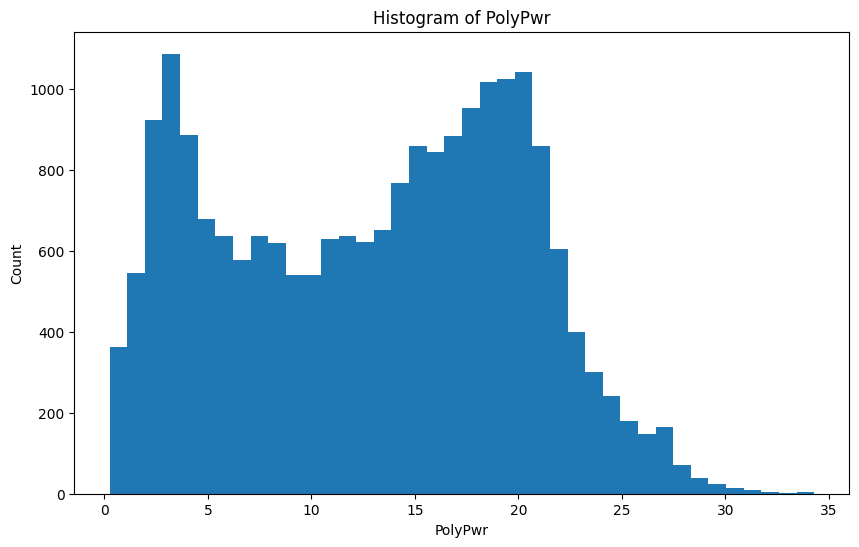

In [ ]:
# Visualize the distribution of the target variable
import matplotlib.pyplot as plt

# Assuming "dfl" is a Pandas DataFrame with a column named "PolyPwr"
plt.figure(figsize=(10, 6))  # Set the size of the figure

# Create the histogram
plt.hist(dfl['PolyPwr'], bins=40)  # Adjust the number of bins as needed

# Add labels and title
plt.xlabel('PolyPwr')
plt.ylabel('Count')
plt.title('Histogram of PolyPwr')

# Show the plot
plt.show()

-> Good distribution of the target value, only for values >30 W we have limited representation of power output
The histogram below does not show a significant skew although there is a limited representation of power output above 30 W.

In [ ]:
distinct_table = dfl[['Location','Latitude', 'Longitude']].drop_duplicates()
print(distinct_table)

          Location  Latitude  Longitude
0           Travis     38.16    -121.56
2746      Peterson     38.82    -104.71
5386    Hill Weber     41.15    -111.99
7770     March AFB     33.90    -117.26
9974         MNANG     44.89     -93.20
10754       Offutt     41.13     -95.75
11635         JDMT     26.98     -80.11
13414        USAFA     38.95    -104.83
15987      Kahului     20.89    -156.44
16928  Camp Murray     47.11    -122.57
18041    Malmstrom     47.52    -111.18
19558      Grissom     40.67     -86.15


In [ ]:
import folium

# Create a map centered at a specific location
map_center = [dfl['Latitude'].mean(), dfl['Longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=4, width='50%', height='50%')

# Filter out duplicate locations based on Longitude and Latitude columns
unique_locations = dfl[['Longitude', 'Latitude']].drop_duplicates()

# Add markers for each unique location
for index, row in unique_locations.iterrows():
    latitude = row['Latitude']
    longitude = row['Longitude']
    folium.Marker([latitude, longitude]).add_to(m)

# Display the map
m


<ipython-input-172-1c6064eae641>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dfl.corr()


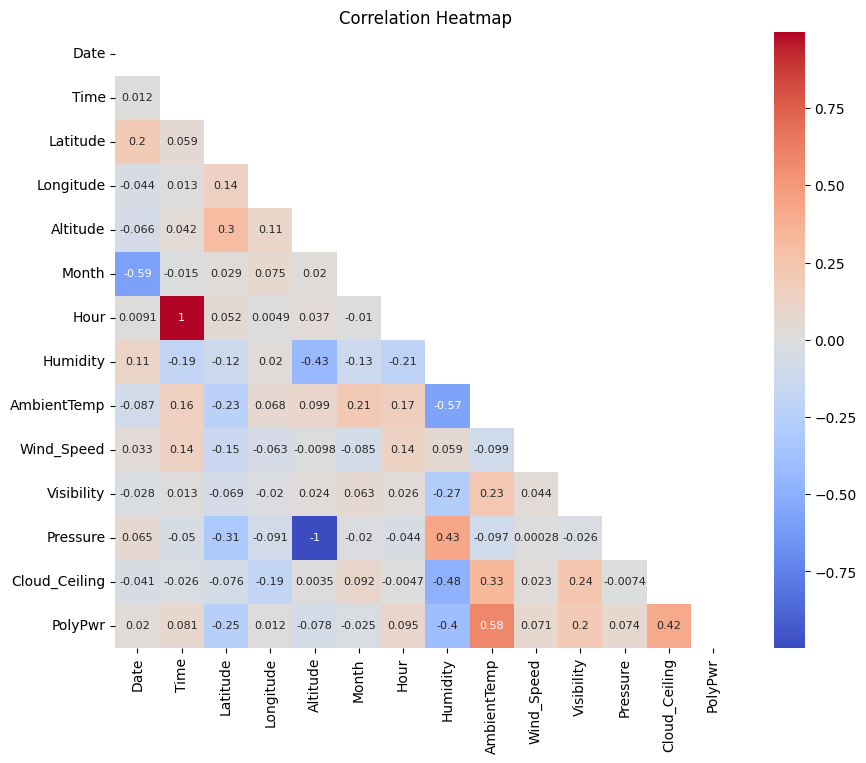

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = dfl.corr()

# Generate a mask to hide the upper triangle of the heatmap
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))


# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))  # Set the size of the figure
sns.heatmap(correlation_matrix, annot=True, mask=mask, annot_kws={"fontsize": 8}, cmap='coolwarm')

# Add title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()


-> Perfect correlation between altitude and pressure, therefore we later use only one of these variables in the model

## Feature Engineering

In [ ]:
# Encode season data as categorical values

# The get_dummies function is used for one-hot encoding categorical variables in pandas.
# It transforms each category into a separate binary column.
# The drop_first=True parameter is used to drop one of the resulting columns
# to avoid multicollinearity. In the given code,
# 'Season_Autumn' is not included in the resulting DataFrame as it is dropped.
import pandas as pd

dfl_season_en = pd.get_dummies(dfl, columns=['Season'], drop_first=True)
dfl_season_en.head()

,Location,Date,Time,Latitude,Longitude,Altitude,Month,Hour,Humidity,AmbientTemp,Wind_Speed,Visibility,Pressure,Cloud_Ceiling,PolyPwr,Season_Spring,Season_Summer,Season_Winter
0,Travis,20170610,1000,38.16,-121.56,1,6,10,30.82,24.57,11,10.00,1010.90,722,17.28,0,1,0
1,Travis,20170611,1000,38.16,-121.56,1,6,10,28.45,25.21,9,10.00,1009.60,722,17.14,0,1,0
2,Travis,20170612,1000,38.16,-121.56,1,6,10,49.51,23.23,11,10.00,1017.00,722,17.39,0,1,0
3,Travis,20170613,1000,38.16,-121.56,1,6,10,37.74,29.04,0,10.00,1015.30,722,16.34,0,1,0
4,Travis,20170614,1000,38.16,-121.56,1,6,10,37.79,29.66,7,9.10,1011.90,722,16.57,0,1,0


In [ ]:
# creating cyclic features
# code represents time-related information in a cyclical manner
# sine and cosine values encode the cyclical patterns, allowing the machine learning model to capture the periodicity and relationships within the data

# Define time bounds in data
min_hour_of_interest = 10
max_hour_of_interest = 15
# Calculate time lapse since onset of power generation
dfl_season_en['delta_hr']= dfl_season_en.Hour - min_hour_of_interest

# Create cyclic month features
dfl_season_en['sin_mon']= np.sin((dfl_season_en.Month - 1)*np.pi/11)
dfl_season_en['cos_mon']= np.cos((dfl_season_en.Month - 1)*np.pi/11)

# Create cyclic hour features
dfl_season_en['sin_hr']= np.sin((dfl_season_en.delta_hr*np.pi/(max_hour_of_interest - min_hour_of_interest)))
dfl_season_en['cos_hr']= np.cos((dfl_season_en.delta_hr*np.pi/(max_hour_of_interest- min_hour_of_interest)))

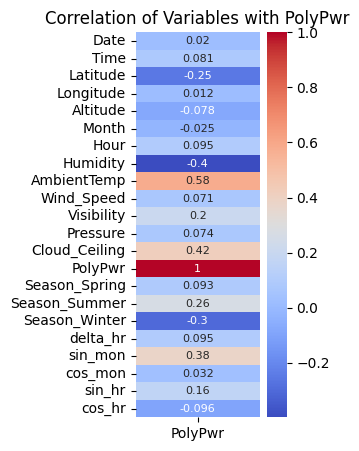

In [ ]:
# Calculate the correlation matrix
correlation_matrix = dfl_season_en.corr(numeric_only = True)

# Select the correlations of "PolyPowr" with other variables
poly_pwr_corr = correlation_matrix['PolyPwr']

# Create a heatmap using Seaborn
plt.figure(figsize=(2, 5))  # Set the size of the figure
sns.heatmap(poly_pwr_corr.to_frame(), annot=True, annot_kws={"fontsize": 8}, cmap='coolwarm')

# Add title
plt.title('Correlation of Variables with PolyPwr')

# Show the plot
plt.show()


## Variable Selection

We select variables based on their relevance to predict power outout and based on availability in the data set for the predicitons.



In [ ]:
selected_columns = ['Latitude', 'Humidity', 'AmbientTemp',
                    'PolyPwr', 'Wind_Speed', 'Visibility',
                    'Altitude', 'Season_Spring',
                    'Season_Summer', 'Season_Winter', 'sin_mon',
                    'cos_mon', 'sin_hr', 'cos_hr']

In [ ]:
dfl_final = dfl_season_en[selected_columns]
# Display the modified DataFrame
dfl_final.head()

,Latitude,Humidity,AmbientTemp,PolyPwr,Wind_Speed,Visibility,Altitude,Season_Spring,Season_Summer,Season_Winter,sin_mon,cos_mon,sin_hr,cos_hr
0,38.16,30.82,24.57,17.28,11,10.00,1,0,1,0,0.99,0.14,0.00,1.00
1,38.16,28.45,25.21,17.14,9,10.00,1,0,1,0,0.99,0.14,0.00,1.00
2,38.16,49.51,23.23,17.39,11,10.00,1,0,1,0,0.99,0.14,0.00,1.00
3,38.16,37.74,29.04,16.34,0,10.00,1,0,1,0,0.99,0.14,0.00,1.00
4,38.16,37.79,29.66,16.57,7,9.10,1,0,1,0,0.99,0.14,0.00,1.00


In [ ]:
dfl_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21045 entries, 0 to 21044
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Latitude       21045 non-null  float64
 1   Humidity       21045 non-null  float64
 2   AmbientTemp    21045 non-null  float64
 3   PolyPwr        21045 non-null  float64
 4   Wind_Speed     21045 non-null  Int64  
 5   Visibility     21045 non-null  float64
 6   Altitude       21045 non-null  Int64  
 7   Season_Spring  21045 non-null  uint8  
 8   Season_Summer  21045 non-null  uint8  
 9   Season_Winter  21045 non-null  uint8  
 10  sin_mon        21045 non-null  Float64
 11  cos_mon        21045 non-null  Float64
 12  sin_hr         21045 non-null  Float64
 13  cos_hr         21045 non-null  Float64
dtypes: Float64(4), Int64(2), float64(5), uint8(3)
memory usage: 1.9 MB


In [ ]:
# Convert the columns to float64 or int to be processible when building models
dfl_final["Wind_Speed"] = dfl_final["Wind_Speed"].astype(int)
dfl_final["Altitude"] = dfl_final["Altitude"].astype(int)
dfl_final["Season_Summer"] = dfl_final["Season_Summer"].astype(int)
dfl_final["Season_Winter"] = dfl_final["Season_Winter"].astype(int)
dfl_final["Season_Spring"] = dfl_final["Season_Spring"].astype(int)
dfl_final["sin_mon"] = dfl_final["sin_mon"].astype(float)
dfl_final["sin_hr"] = dfl_final["sin_hr"].astype(float)
dfl_final["cos_mon"] = dfl_final["cos_mon"].astype(float)
dfl_final["cos_hr"] = dfl_final["cos_hr"].astype(float)


# Check the data type of the modified column
print(dfl_final["Season_Summer"].dtype)
print(dfl_final["Season_Winter"].dtype)
print(dfl_final["sin_mon"].dtype)
print(dfl_final["sin_hr"].dtype)



int64
int64
float64
float64


<ipython-input-179-2507130feca2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfl_final["Wind_Speed"] = dfl_final["Wind_Speed"].astype(int)
<ipython-input-179-2507130feca2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfl_final["Altitude"] = dfl_final["Altitude"].astype(int)
<ipython-input-179-2507130feca2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

In [ ]:
dfl_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21045 entries, 0 to 21044
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Latitude       21045 non-null  float64
 1   Humidity       21045 non-null  float64
 2   AmbientTemp    21045 non-null  float64
 3   PolyPwr        21045 non-null  float64
 4   Wind_Speed     21045 non-null  int64  
 5   Visibility     21045 non-null  float64
 6   Altitude       21045 non-null  int64  
 7   Season_Spring  21045 non-null  int64  
 8   Season_Summer  21045 non-null  int64  
 9   Season_Winter  21045 non-null  int64  
 10  sin_mon        21045 non-null  float64
 11  cos_mon        21045 non-null  float64
 12  sin_hr         21045 non-null  float64
 13  cos_hr         21045 non-null  float64
dtypes: float64(9), int64(5)
memory usage: 2.2 MB


In [ ]:
dfl_final.describe()

,Latitude,Humidity,AmbientTemp,PolyPwr,Wind_Speed,Visibility,Altitude,Season_Spring,Season_Summer,Season_Winter,sin_mon,cos_mon,sin_hr,cos_hr
count,21045.00,21045.00,21045.00,21045.00,21045.00,21045.00,21045.00,21045.00,21045.00,21045.00,21045.00,21045.00,21045.00,21045.00
mean,38.21,37.12,29.29,12.98,10.32,9.70,798.84,0.23,0.39,0.17,0.68,-0.02,0.53,-0.06
std,6.32,23.82,12.37,7.12,6.39,1.35,770.68,0.42,0.49,0.38,0.34,0.65,0.39,0.75
min,20.89,0.00,-19.98,0.26,0.00,0.00,1.00,0.00,0.00,0.00,0.00,-1.00,0.00,-1.00
25%,38.16,17.53,21.92,6.40,6.00,10.00,2.00,0.00,0.00,0.00,0.54,-0.65,0.00,-0.81
50%,38.95,33.12,30.29,13.80,9.00,10.00,458.00,0.00,0.00,0.00,0.76,-0.14,0.59,-0.31
75%,41.15,52.59,37.47,18.86,14.00,10.00,1370.00,0.00,1.00,0.00,0.99,0.65,0.95,0.81
max,47.52,99.99,65.74,34.29,49.00,10.00,1947.00,1.00,1.00,1.00,0.99,1.00,0.95,1.00


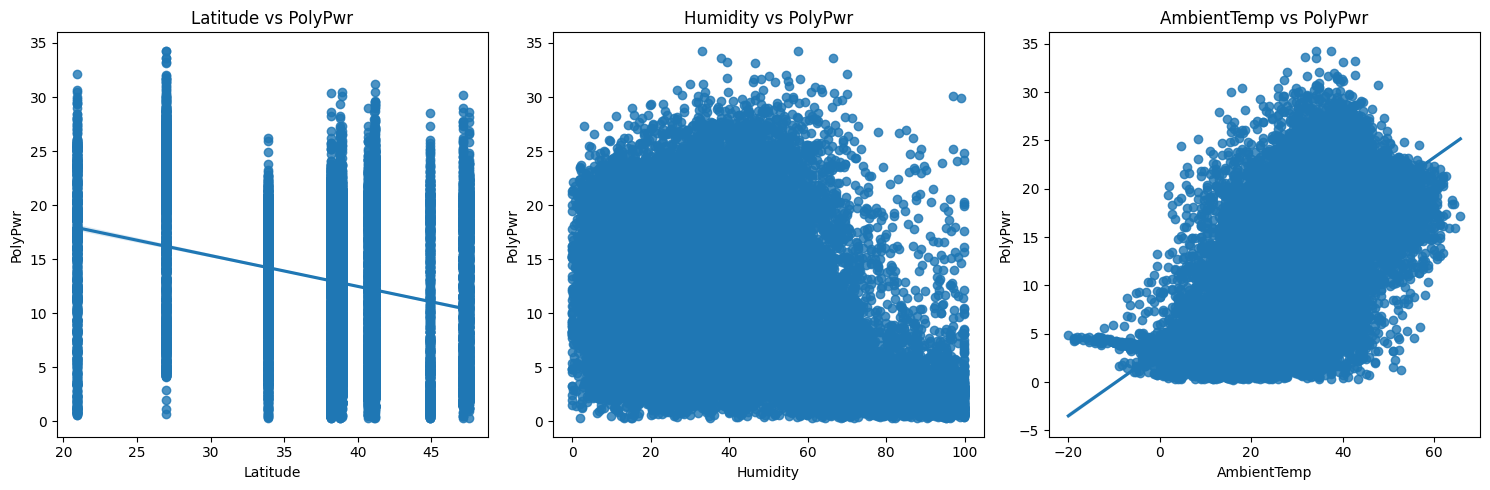

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot the regression plots on each subplot
sns.regplot(x="Latitude", y="PolyPwr", data=dfl_final, ax=axes[0])
axes[0].set_title('Latitude vs PolyPwr')

sns.regplot(x="Humidity", y="PolyPwr", data=dfl_final, ax=axes[1])
axes[1].set_title('Humidity vs PolyPwr')

sns.regplot(x="AmbientTemp", y="PolyPwr", data=dfl_final, ax=axes[2])
axes[2].set_title('AmbientTemp vs PolyPwr')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()



In [ ]:
sns.pairplot(dfl_final)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
dfl_final.corr()

,Latitude,Humidity,AmbientTemp,PolyPwr,Wind_Speed,Visibility,Altitude,Season_Spring,Season_Summer,Season_Winter,sin_mon,cos_mon,sin_hr,cos_hr
Latitude,1.00,-0.12,-0.23,-0.25,-0.15,-0.07,0.30,-0.08,0.13,-0.05,0.13,-0.04,0.02,-0.06
Humidity,-0.12,1.00,-0.57,-0.40,0.06,-0.27,-0.43,0.09,-0.13,0.09,-0.12,0.13,-0.05,0.21
AmbientTemp,-0.23,-0.57,1.00,0.58,-0.10,0.23,0.10,-0.17,0.45,-0.41,0.51,-0.24,0.02,-0.17
PolyPwr,-0.25,-0.40,0.58,1.00,0.07,0.20,-0.08,0.09,0.26,-0.30,0.38,0.03,0.16,-0.10
Wind_Speed,-0.15,0.06,-0.10,0.07,1.00,0.04,-0.01,0.11,-0.05,-0.02,0.02,0.10,-0.00,-0.14
Visibility,-0.07,-0.27,0.23,0.20,0.04,1.00,0.02,-0.04,0.07,-0.08,0.08,-0.07,-0.02,-0.03
Altitude,0.30,-0.43,0.10,-0.08,-0.01,0.02,1.00,-0.04,0.07,-0.06,0.10,-0.03,0.01,-0.04
Season_Spring,-0.08,0.09,-0.17,0.09,0.11,-0.04,-0.04,1.00,-0.44,-0.25,0.12,0.53,-0.01,0.01
Season_Summer,0.13,-0.13,0.45,0.26,-0.05,0.07,0.07,-0.44,1.00,-0.36,0.66,-0.17,-0.01,0.01
Season_Winter,-0.05,0.09,-0.41,-0.30,-0.02,-0.08,-0.06,-0.25,-0.36,1.00,-0.81,0.27,0.04,-0.03


## Normalize and Split Data

We now are preparing the data for a machine learning model by performing the following steps:
1. The target variable is extracted from the DataFrame 'dfl_final' and stored in the variable 'target'.
2. The features are extracted by dropping the 'PolyPwr' column from the DataFrame 'dfl_final' and stored in the variable 'features'.
3. The features are normalized using the MinMaxScaler, which scales the values to a range between 0 and 1.
4. The normalized data is split into training and testing sets using train_test_split. The test_size parameter determines the proportion of data allocated for testing, and the random_state parameter ensures reproducibility.
5. The shapes of the resulting datasets are printed to display the number of samples and features in each set.

In [ ]:
dfl_final

,Latitude,Humidity,AmbientTemp,PolyPwr,Wind_Speed,Visibility,Altitude,Season_Spring,Season_Summer,Season_Winter,sin_mon,cos_mon,sin_hr,cos_hr
0,38.16,30.82,24.57,17.28,11,10.00,1,0,1,0,0.99,0.14,0.00,1.00
1,38.16,28.45,25.21,17.14,9,10.00,1,0,1,0,0.99,0.14,0.00,1.00
2,38.16,49.51,23.23,17.39,11,10.00,1,0,1,0,0.99,0.14,0.00,1.00
3,38.16,37.74,29.04,16.34,0,10.00,1,0,1,0,0.99,0.14,0.00,1.00
4,38.16,37.79,29.66,16.57,7,9.10,1,0,1,0,0.99,0.14,0.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21040,40.67,21.03,36.18,13.62,10,10.00,239,0,0,0,0.76,-0.65,0.00,-1.00
21041,40.67,41.82,19.96,2.81,0,10.00,239,0,0,0,0.76,-0.65,0.00,-1.00
21042,40.67,31.58,38.74,13.53,9,10.00,239,0,0,0,0.54,-0.84,0.00,-1.00
21043,40.67,85.00,22.66,0.44,6,10.00,239,0,0,0,0.54,-0.84,0.00,-1.00


In [ ]:
import pandas_gbq

# Define the BigQuery project ID and destination table
project_id = 'solarinsight-383513'
table_id = 'electricity_production_data.trainings_data_not_normalized'

# Save the DataFrame to BigQuery
pandas_gbq.to_gbq(dfl_final, table_id, project_id=project_id, if_exists='replace')


100%|██████████| 1/1 [00:00<00:00, 1731.75it/s]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Extract the target variable
target = dfl_final['PolyPwr']

# Extract the features (all columns except the target variable)
features = dfl_final.drop('PolyPwr', axis=1)

# Normalize the features
scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(features)

# Split the normalized data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(normalized_features, target, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (16836, 13)
X_test shape: (4209, 13)
y_train shape: (16836,)
y_test shape: (4209,)


In [ ]:
print('means', normalized_features.mean(axis=0))
print('std', normalized_features.std(axis=0))
print('Min  ', normalized_features.min(axis=0))
print('Max ', normalized_features.max(axis=0))

means [0.65053786 0.37126474 0.57474109 0.21057792 0.97000713 0.40999161
 0.22846282 0.39002138 0.17210739 0.69031986 0.48813651 0.55644961
 0.47167462]
std [0.23746191 0.23825354 0.14426629 0.13030364 0.13519165 0.3960244
 0.4198423  0.48775476 0.37747375 0.33882798 0.32406324 0.4109585
 0.37548719]
Min   [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Max  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


## Building Models

In this section we try to train various models:
1. K Nearest Neighbors (KNN): The KNN regressor is trained using the KNeighborsRegressor class from scikit-learn. It is a simple and intuitive algorithm that predicts the target variable by finding the K nearest neighbors in the training set and taking the average of their target values. KNN is used as a baseline model to compare against other models.
2. Random Forest (RF): The Random Forest regressor is trained using the RandomForestRegressor class from scikit-learn. It is an ensemble learning method that combines multiple decision trees to make predictions. Random Forests are known for their robustness, scalability, and ability to handle complex datasets.
3. Light Gradient Boosting Machine (LGBM): The LGBM regressor is trained using the LGBMRegressor class from the LightGBM library. LightGBM is a gradient boosting framework that uses a tree-based learning algorithm and is known for its efficiency, speed, and accuracy.
4. XGBoost: The XGBoost regressor is trained using the XGBRegressor class from the XGBoost library. XGBoost is another gradient boosting library that has gained popularity for its performance and flexibility in handling various machine learning tasks.
5. Stacked Ensemble: The ensemble prediction is created by taking the average of predictions from the Random Forest, LGBM, and XGBoost models. This ensemble approach combines the predictions of multiple models to potentially improve overall performance.
6. Deep Neural Network (DNN): The DNN model is trained using a sequential model from the Keras API, which is a high-level neural networks library running on top of TensorFlow. The DNN consists of multiple densely connected layers and is trained using the Adam optimizer and mean squared error loss. Deep Neural Networks can capture complex patterns and relationships in the data.

These models are trained to predict the target variable power output using the normalized training data (X_train and y_train). The predictions are then evaluated using the mean squared error (RMSE) metric to measure the performance of each model.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error
import xgboost as xgb

# Baseline model: K Nearest Neighbors (KNN)
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_rmse = mean_squared_error(y_test, knn_pred, squared=False)
print("KNN RMSE:", knn_rmse)

# Random Forest (RF) model
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_rmse = mean_squared_error(y_test, rf_pred, squared=False)
print("Random Forest RMSE:", rf_rmse)

# Light Gradient Boosting Machine (LGBM) model
lgbm = lgb.LGBMRegressor()
lgbm.fit(X_train, y_train)
lgbm_pred = lgbm.predict(X_test)
lgbm_rmse = mean_squared_error(y_test, lgbm_pred, squared=False)
print("LGBM RMSE:", lgbm_rmse)

# XGBoost model
xgboost = xgb.XGBRegressor()
xgboost.fit(X_train, y_train)
xgboost_pred = xgboost.predict(X_test)
xgboost_rmse = mean_squared_error(y_test, xgboost_pred, squared=False)
print("XGBoost RMSE:", xgboost_rmse)

# Stacked Ensemble
ensemble_pred = (rf_pred + lgbm_pred + xgboost_pred ) / 3
ensemble_rmse = mean_squared_error(y_test, ensemble_pred, squared=False)
print("Ensemble RMSE:", ensemble_rmse)

# Deep Neural Network (DNN) model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=10, batch_size=32)
dnn_pred = model.predict(X_test)
dnn_rmse = mean_squared_error(y_test, dnn_pred, squared=False)
print("DNN RMSE:", dnn_rmse)

KNN RMSE: 4.737857886520251
Random Forest RMSE: 4.348915766533828
LGBM RMSE: 4.319866837729403
XGBoost RMSE: 4.398650009414675
Ensemble RMSE: 4.265431602544866
Epoch 1/10
527/527 [==============================] - 2s 2ms/step - loss: 44.6125
Epoch 2/10
527/527 [==============================] - 1s 2ms/step - loss: 24.8461
Epoch 3/10
527/527 [==============================] - 1s 3ms/step - loss: 24.1198
Epoch 4/10
527/527 [==============================] - 3s 5ms/step - loss: 23.4337
Epoch 5/10
527/527 [==============================] - 3s 5ms/step - loss: 22.8268
Epoch 6/10
527/527 [==============================] - 2s 4ms/step - loss: 22.3554
Epoch 7/10
527/527 [==============================] - 1s 3ms/step - loss: 22.1133
Epoch 8/10
527/527 [==============================] - 1s 2ms/step - loss: 21.8207
Epoch 9/10
527/527 [==============================] - 1s 3ms/step - loss: 21.5875
Epoch 10/10
132/132 [==============================] - 1s 3ms/step
DNN RMSE: 4.627405017175957


Now we print more evaluation metrics to compare the models.

In [ ]:
import pandas as pd
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Adjust pandas display options
pd.set_option('display.float_format', '{:.6f}'.format)  # Display up to 6 decimal places

# Create a DataFrame to store the evaluation metrics
metrics = pd.DataFrame(columns=['Model', 'RMSE', 'R-squared', 'MAE', 'MSE'])

# Baseline model: K Nearest Neighbors (KNN)
knn_metrics = ['K Nearest Neighbors (KNN)', knn_rmse, r2_score(y_test, knn_pred), mean_absolute_error(y_test, knn_pred), mean_squared_error(y_test, knn_pred)]
metrics.loc[0] = knn_metrics

# Random Forest (RF) model
rf_metrics = ['Random Forest', rf_rmse, r2_score(y_test, rf_pred), mean_absolute_error(y_test, rf_pred), mean_squared_error(y_test, rf_pred)]
metrics.loc[1] = rf_metrics

# Light Gradient Boosting Machine (LGBM) model
lgbm_metrics = ['LightGBM', lgbm_rmse, r2_score(y_test, lgbm_pred), mean_absolute_error(y_test, lgbm_pred), mean_squared_error(y_test, lgbm_pred)]
metrics.loc[2] = lgbm_metrics

# XGBoost model
dnn_metrics = ['XGBoost', xgboost_rmse, r2_score(y_test, xgboost_pred), mean_absolute_error(y_test, xgboost_pred), mean_squared_error(y_test, xgboost_pred)]
metrics.loc[3] = dnn_metrics

# Stacked Ensemble
ensemble_metrics = ['Stacked Ensemble', ensemble_rmse, r2_score(y_test, ensemble_pred), mean_absolute_error(y_test, ensemble_pred), mean_squared_error(y_test, ensemble_pred)]
metrics.loc[4] = ensemble_metrics

# Deep Neural Network (DNN) model
dnn_metrics = ['Deep Neural Network (DNN)', dnn_rmse, r2_score(y_test, dnn_pred), mean_absolute_error(y_test, dnn_pred), mean_squared_error(y_test, dnn_pred)]
metrics.loc[5] = dnn_metrics

# Set the model column as the index
metrics.set_index('Model', inplace=True)

# Display the metrics table
print(metrics)


                              RMSE  R-squared      MAE       MSE
Model                                                           
K Nearest Neighbors (KNN) 4.737858   0.558231 3.281557 22.447297
Random Forest             4.348916   0.627785 3.049916 18.913068
LightGBM                  4.319867   0.632741 3.103764 18.661249
XGBoost                   4.398650   0.619223 3.136412 19.348122
Stacked Ensemble          4.265432   0.641939 3.030219 18.193907
Deep Neural Network (DNN) 4.627405   0.578588 3.448416 21.412877


These are the metrics, without normalization, so we can see a distinct improvement when using normalization.


Without normalization:
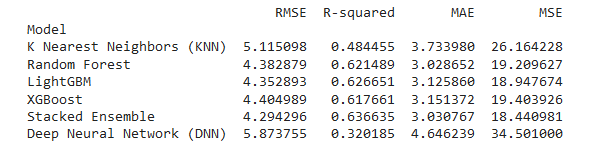

No we dive deeper into building a neural network and try different approaches to improve performance.

### Neural Network

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

# Load your data

# Define the base model
def create_model(hidden_units=10, activation='relu', optimizer='adam'):
    model = Sequential()
    model.add(Dense(hidden_units, input_dim=X_train.shape[1], activation=activation))
    model.add(Dense(1))  # Output layer
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

# Create the KerasRegressor wrapper for scikit-learn compatibility
model = KerasRegressor(build_fn=create_model, verbose=0)

# Define the hyperparameter grid for grid search
param_grid = {
    'hidden_units': [5, 10, 15],
    'activation': ['relu', 'sigmoid'],
    'optimizer': ['adam', 'sgd']
}

# Perform grid search for hyperparameter tuning
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train, y_train)

# Get the best model and print the best hyperparameters
best_model = grid_result.best_estimator_
best_params = grid_result.best_params_
print("Best Hyperparameters:", best_params)

# Train the best model on the full training set
best_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

# Evaluate the model on test data
y_pred = best_model.predict(X_test)



<ipython-input-197-1c40c32aa29e>:17: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_model, verbose=0)


Best Hyperparameters: {'activation': 'relu', 'hidden_units': 5, 'optimizer': 'sgd'}


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)


RMSE: 5.116267815020478
R-squared: 0.4848449141388106
MAE: 4.042423813314585
MSE: 26.176196355014422


Testing how considering the validation datawhen fitting the model changes the evaluation metrics

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

# Load your data

# Define the base model
def create_model(hidden_units=10, activation='relu', optimizer='adam'):
    model = Sequential()
    model.add(Dense(hidden_units, input_dim=X_train.shape[1], activation=activation))
    model.add(Dense(1))  # Output layer
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

# Create the KerasRegressor wrapper for scikit-learn compatibility
model = KerasRegressor(build_fn=create_model, verbose=0)

# Define the hyperparameter grid for grid search
param_grid = {
    'hidden_units': [5, 10, 15],
    'activation': ['relu', 'sigmoid'],
    'optimizer': ['adam', 'sgd']
}

# Perform grid search for hyperparameter tuning
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train, y_train)

# Get the best model and print the best hyperparameters
best_model = grid_result.best_estimator_
best_params = grid_result.best_params_
print("Best Hyperparameters:", best_params)

# Train the best model on the full training set
best_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0, validation_data=(X_test, y_test))

# Evaluate the model on test data
y_pred = best_model.predict(X_test)



<ipython-input-199-d35b3a889012>:17: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_model, verbose=0)


Best Hyperparameters: {'activation': 'relu', 'hidden_units': 15, 'optimizer': 'sgd'}


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)


RMSE: 4.696663348934655
R-squared: 0.5658794793598323
MAE: 3.5920138599271225
MSE: 22.05864661322609


-> evaluation metrics are better than without using the validation data

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

# Load your data
# Assuming you have X_train, y_train as training data

# Define the base model
def create_model(hidden_units=10, activation='relu', optimizer='adam'):
    model = Sequential()
    model.add(Dense(hidden_units, input_dim=X_train.shape[1], activation=activation))
    model.add(Dense(1))  # Output layer
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

# Create the KerasRegressor wrapper for scikit-learn compatibility
model = KerasRegressor(build_fn=create_model, verbose=0)

# Define the hyperparameter grid for grid search
param_grid = {
    'hidden_units': [5, 10, 15],
    'activation': ['relu', 'sigmoid'],
    'optimizer': ['adam', 'sgd'],
    'batch_size': [32, 64],
    'epochs': [50, 100]
}

# Perform grid search for hyperparameter tuning
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train, y_train)

# Get the best model and print the best hyperparameters
best_model = grid_result.best_estimator_
best_params = grid_result.best_params_
print("Best Hyperparameters:", best_params)

# Train the best model on the full training set
best_model.fit(X_train, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'], verbose=0, validation_data=(X_test, y_test))

# Evaluate the model on test data
y_pred = best_model.predict(X_test)

# Print evaluation metrics or perform further analysis as needed


<ipython-input-202-d834683759ba>:18: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_model, verbose=0)


Best Hyperparameters: {'activation': 'sigmoid', 'batch_size': 32, 'epochs': 100, 'hidden_units': 15, 'optimizer': 'sgd'}


Best Hyperparameters: {'activation': 'sigmoid', 'batch_size': 32, 'epochs': 100, 'hidden_units': 15, 'optimizer': 'sgd'}

In [ ]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

RMSE: 4.679257616052818
R-squared: 0.5690911995661834
MAE: 3.3746075919548684
MSE: 21.8954518373883


-> more intensive type of hyperparameter training takes a lot more time but gives also way better results
-> still not as good as the stacked ensamble

In [ ]:
%%time
import numpy as np
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from scipy.stats import randint as sp_randint, uniform

# Load your data
# Assuming you have X_train, y_train as training data

# Define the base model
def create_model(hidden_units=10, activation='relu', optimizer='adam'):
    model = Sequential()
    model.add(Dense(hidden_units, input_dim=X_train.shape[1], activation=activation))
    model.add(Dense(1))  # Output layer
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

# Create the KerasRegressor wrapper for scikit-learn compatibility
model = KerasRegressor(build_fn=create_model, verbose=0)

# Define the hyperparameter distributions for randomized search
param_dist = {
    'hidden_units': sp_randint(5, 20),
    'activation': ['relu', 'sigmoid'],
    'optimizer': ['adam', 'sgd'],
    'batch_size': sp_randint(16, 128),
    'epochs': sp_randint(50, 200)
}

# Perform randomized search for hyperparameter tuning
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=20, cv=3)
random_result = random_search.fit(X_train, y_train)

# Get the best model and print the best hyperparameters
best_model = random_result.best_estimator_
best_params = random_result.best_params_
print("Best Hyperparameters:", best_params)

# Train the best model on the full training set
best_model.fit(X_train, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'], verbose=0)

# Evaluate the model on test data
y_pred = best_model.predict(X_test)

# Print evaluation metrics or perform further analysis as needed


Best Hyperparameters: {'activation': 'sigmoid', 'batch_size': 50, 'epochs': 179, 'hidden_units': 8, 'optimizer': 'sgd'}

In [ ]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

-> more hyperparameter tuning lead to worse evaluation metrics

## Hyperparameter Tuning
As the neural network could not outperform our initially used models, we continue with working on the other models:

Now we perform a hyperparameter search using randomized search cross-validation to find the best hyperparameters for each model (K Nearest Neighbors, Random Forest, Light Gradient Boosting Machine, and XGBoost). The best hyperparameters can then be used to train the final models with improved performance.


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

# Hyperparameter grid for each model
knn_param_grid = {
    'n_neighbors': range(1, 21),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

lgbm_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Hyperparameter grid for XGBoost
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2]
}


# Perform random search cross-validation for each model
knn_random_search = RandomizedSearchCV(knn, knn_param_grid, n_iter=100, cv=4, random_state=42)
knn_random_search.fit(X_train, y_train)

# Perform random search cross-validation for XGBoost
xgb_random_search = RandomizedSearchCV(xgboost, xgb_param_grid, n_iter=100, cv=4, random_state=42)
xgb_random_search.fit(X_train, y_train)

rf_random_search = RandomizedSearchCV(rf, rf_param_grid, n_iter=100, cv=4, random_state=42)
rf_random_search.fit(X_train, y_train)

lgbm_random_search = RandomizedSearchCV(lgbm, lgbm_param_grid, n_iter=100, cv=4, random_state=42)
lgbm_random_search.fit(X_train, y_train)

# Print the best hyperparameters for each model
print("Best hyperparameters for K Nearest Neighbors (KNN):", knn_random_search.best_params_)
print("Best hyperparameters for Random Forest (RF):", rf_random_search.best_params_)
print("Best hyperparameters for Light Gradient Boosting Machine (LGBM):", lgbm_random_search.best_params_)
print("Best hyperparameters for XGBoost (XGB):", xgb_random_search.best_params_)


In [ ]:
# intermediate storage to use parameters again later
knn_random_search.best_params_ = {'weights': 'distance', 'p': 1, 'n_neighbors': 8}
rf_random_search.best_params_ = {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}
lgbm_random_search.best_params_ =  {'subsample': 0.9, 'n_estimators': 200, 'max_depth': 20, 'learning_rate': 0.1, 'colsample_bytree': 0.9}
xgb_random_search.best_params_ = {'subsample': 0.9, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.8}

In [ ]:
# Store the best parameters in a DataFrame
best_params_data = {
    'model': ['K Nearest Neighbors (KNN)', 'Random Forest (RF)', 'Light Gradient Boosting Machine (LGBM)', 'XGBoost (XGB)'],
    'best_params': [knn_random_search.best_params_, rf_random_search.best_params_, lgbm_random_search.best_params_, xgb_random_search.best_params_]
}
best_params_df = pd.DataFrame(best_params_data)

In [ ]:
%%bigquery dfl --project solarinsight-383513
CREATE OR REPLACE TABLE `solarinsight-383513.electricity_production_data.best_parameters`
(
  model STRING,
  best_params STRING
);

In [ ]:
import pandas as pd
import pandas_gbq

# Convert dictionary objects to string representation
best_params_df['best_params'] = best_params_df['best_params'].apply(str)

# Define the BigQuery project ID and destination table
project_id = 'solarinsight-383513'
table_id = 'electricity_production_data.best_parameters'

# Save the DataFrame to BigQuery
pandas_gbq.to_gbq(best_params_df, table_id, project_id=project_id, if_exists='replace')


The best parameters are now stored here:
https://console.cloud.google.com/bigquery?hl=de&project=solarinsight-383513&ws=!1m10!1m4!4m3!1ssolarinsight-383513!2selectricity_production_data!3sbest_parameters!1m4!1m3!1ssolarinsight-383513!2sbquxjob_66681cd4_18876789834!3sUS

In [ ]:
# Baseline model: K Nearest Neighbors (KNN)
knn_best = KNeighborsRegressor(**knn_random_search.best_params_)
knn_best.fit(X_train, y_train)
knn_pred_best = knn_best.predict(X_test)
knn_rmse_best = mean_squared_error(y_test, knn_pred_best, squared=False)
knn_r2_best = knn_best.score(X_test, y_test)
knn_mae_best = mean_absolute_error(y_test, knn_pred_best)
knn_mse_best = mean_squared_error(y_test, knn_pred_best)

print("KNN Best RMSE:", knn_rmse_best)
print("KNN Best R^2:", knn_r2_best)
print("KNN Best MAE:", knn_mae_best)
print("KNN Best MSE:", knn_mse_best)


# Random Forest (RF) model
rf_best = RandomForestRegressor(**rf_random_search.best_params_)
rf_best.fit(X_train, y_train)
rf_pred_best = rf_best.predict(X_test)
rf_rmse_best = mean_squared_error(y_test, rf_pred_best, squared=False)
rf_r2_best = rf_best.score(X_test, y_test)
rf_mae_best = mean_absolute_error(y_test, rf_pred_best)
rf_mse_best = mean_squared_error(y_test, rf_pred_best)

print("Random Forest Best RMSE:", rf_rmse_best)
print("Random Forest Best R^2:", rf_r2_best)
print("Random Forest Best MAE:", rf_mae_best)
print("Random Forest Best MSE:", rf_mse_best)

# Light Gradient Boosting Machine (LGBM) model
lgbm_best = lgb.LGBMRegressor(**lgbm_random_search.best_params_)
lgbm_best.fit(X_train, y_train)
lgbm_pred_best = lgbm_best.predict(X_test)
lgbm_rmse_best = mean_squared_error(y_test, lgbm_pred_best, squared=False)
lgbm_r2_best = lgbm_best.score(X_test, y_test)
lgbm_mae_best = mean_absolute_error(y_test, lgbm_pred_best)
lgbm_mse_best = mean_squared_error(y_test, lgbm_pred_best)

print("LGBM Best RMSE:", lgbm_rmse_best)
print("LGBM Best R^2:", lgbm_r2_best)
print("LGBM Best MAE:", lgbm_mae_best)
print("LGBM Best MSE:", lgbm_mse_best)

# Deep Neural Network (DNN) model
xgb_best = xgb.XGBRegressor(**xgb_random_search.best_params_)
xgb_best.fit(X_train, y_train)
xgb_pred_best = xgb_best.predict(X_test)
xgb_rmse_best = mean_squared_error(y_test, xgb_pred_best, squared=False)
xgb_r2_best = xgb_best.score(X_test, y_test)
xgb_mae_best = mean_absolute_error(y_test, xgb_pred_best)
xgb_mse_best = mean_squared_error(y_test, xgb_pred_best)

print("XGB Best RMSE:", xgb_rmse_best)
print("XGB Best R^2:", xgb_r2_best)
print("XGB Best MAE:", xgb_mae_best)
print("XGB Best MSE:", xgb_mse_best)

# Stacked Ensemble
ensemble_pred_best = (rf_pred_best + lgbm_pred_best + xgb_pred_best) / 3
ensemble_rmse_best = mean_squared_error(y_test, ensemble_pred_best, squared=False)
ensemble_r2_best = r2_score(y_test, ensemble_pred_best)
ensemble_mae_best = mean_absolute_error(y_test, ensemble_pred_best)
ensemble_mse_best = mean_squared_error(y_test, ensemble_pred_best)

print("Ensemble Best RMSE:", ensemble_rmse_best)
print("Ensemble Best R^2:", ensemble_r2_best)
print("Ensemble Best MAE:", ensemble_mae_best)
print("Ensemble Best MSE:", ensemble_mse_best)


In [ ]:
# Create a DataFrame to store the evaluation metrics
best_metrics = pd.DataFrame(columns=['Model', 'RMSE', 'R-squared', 'MAE', 'MSE'])

# Baseline model: K Nearest Neighbors (KNN)
best_knn_metrics = ['KNN', knn_rmse_best, knn_r2_best, knn_mae_best, knn_mse_best]
best_metrics.loc[0] = best_knn_metrics

# Random Forest (RF) model
best_rf_metrics = ['Random Forest', rf_rmse_best, rf_r2_best, rf_mae_best, rf_mse_best]
best_metrics.loc[1] = best_rf_metrics

# Light Gradient Boosting Machine (LGBM) model
best_lgbm_metrics = ['LightGBM', lgbm_rmse_best, lgbm_r2_best, lgbm_mae_best, lgbm_mse_best]
best_metrics.loc[2] = best_lgbm_metrics

# Deep Neural Network (DNN) model
best_xgb_metrics = ['XGBoost (XGB)', xgb_rmse_best, xgb_r2_best, xgb_mae_best, xgb_mse_best]
best_metrics.loc[3] = best_xgb_metrics

# Stacked Ensemble
best_ensemble_metrics = ['Stacked Ensemble', ensemble_rmse_best, ensemble_r2_best, ensemble_mae_best, ensemble_mse_best]
best_metrics.loc[4] = best_ensemble_metrics

# Set the model column as the index
best_metrics.set_index('Model', inplace=True)

# Display the metrics table
print(best_metrics)


Below are our initial metrics, without hyperparameter tuning. We can see an improvement of the evaluation metrics for every model.

In [ ]:
# Metrics without hyperparameter tuning
print(metrics)

The evaluation of the different models shows that the Stacked Ensemble has the best performance (with hyperparameter tuning) with a R-Squared of 64.54%  and a RMSE of 4.24 Watt.

## Inference

In [ ]:
import pandas as pd

# Make predictions on the test set
y_pred = lgbm.predict(X_test)

# Create a DataFrame to compare the actual and predicted values
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Print the DataFrame
comparison_df


,Actual,Predicted
20644,24.659540,16.956994
20802,5.078300,5.838006
6836,21.167150,20.872568
5865,7.248710,5.141438
7628,17.372230,19.947093
...,...,...
11244,9.984890,15.114953
2909,3.026680,3.245380
17760,15.998100,14.436900
17936,18.490550,18.770468


In [ ]:
#Prediction on full dataset

y_all_pred = lgbm.predict(normalized_features)
r2_score(target, y_all_pred)


0.6808543394705471

In [ ]:
#Feature importance

# Calculate scaled feature importance as a percentage
feat_imp_score = (lgbm.feature_importances_/max(lgbm.feature_importances_)*100).tolist()
input_feat = dfl_final.drop('PolyPwr', axis=1).columns
feature_ranking_with_score = dict(sorted(zip(feat_imp_score, input_feat), reverse=True))
feature_ranking_with_score

{100.0: 'AmbientTemp',
 97.0404984423676: 'Humidity',
 54.04984423676012: 'Latitude',
 48.28660436137071: 'Wind_Speed',
 40.965732087227416: 'Altitude',
 30.8411214953271: 'sin_mon',
 27.570093457943923: 'cos_mon',
 24.45482866043614: 'cos_hr',
 21.806853582554517: 'sin_hr',
 9.034267912772584: 'Season_Spring',
 7.165109034267912: 'Visibility',
 3.4267912772585665: 'Season_Summer',
 2.64797507788162: 'Season_Winter'}

# Step 3: Using the trained model to predict power output in Germany

### Data Loading
Load the weather forecast data and the station information data set.

In [ ]:

%%bigquery df_weather_forecast --project solarinsight-383513
SELECT
*
FROM
  `solarinsight-383513.electricity_production_data.weather_forecast_data`

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:

%%bigquery df_final_station --project solarinsight-383513
SELECT
*
FROM
  `solarinsight-383513.electricity_production_data.final_station_information`

In [ ]:
df_weather_forecast.head()

,STATIONS_ID,MESS_DATUM,Wind_Speed,Visibility,AmbientTemp,Humidity
0,2564,2024-02-09 12:00:00+00:00,23.829703,75.217006,16.710719,35.882389
1,2564,2023-06-09 04:00:00+00:00,9.109431,27.293519,7.612364,90.212777
2,2564,2024-07-22 15:00:00+00:00,26.754903,69.565699,24.335524,26.164962
3,2564,2024-07-05 02:00:00+00:00,4.881119,43.606447,1.231453,103.010045
4,2564,2024-07-22 08:00:00+00:00,20.158258,50.980766,17.939302,55.293823


In [ ]:
# add initial informations on stations
df_weather_forecast_merge = df_weather_forecast.merge(df_final_station, on='STATIONS_ID', how='left')


In [ ]:
df_weather_forecast_merge.head()

,STATIONS_ID,MESS_DATUM,Wind_Speed,Visibility,AmbientTemp,Humidity,endDate,Altitude,Latitude,Longitude,Stationsname,Bundesland
0,2564,2024-05-10 06:00:00+00:00,14.817314,62.345953,9.719818,75.588046,20230606,28,54.3776,10.1424,Kiel-Holtenau,Schleswig-Holstein
1,2564,2023-09-03 22:00:00+00:00,10.157335,36.091851,9.813699,85.406756,20230606,28,54.3776,10.1424,Kiel-Holtenau,Schleswig-Holstein
2,2564,2024-03-16 06:00:00+00:00,14.657723,55.280452,10.967104,81.984909,20230606,28,54.3776,10.1424,Kiel-Holtenau,Schleswig-Holstein
3,2564,2023-11-21 18:00:00+00:00,16.472082,60.032468,13.897267,52.352977,20230606,28,54.3776,10.1424,Kiel-Holtenau,Schleswig-Holstein
4,2564,2024-02-23 17:00:00+00:00,16.533598,48.108731,15.832151,43.762036,20230606,28,54.3776,10.1424,Kiel-Holtenau,Schleswig-Holstein


In [ ]:
df_weather_forecast_merge.describe()

,STATIONS_ID,Wind_Speed,Visibility,AmbientTemp,Humidity,endDate,Altitude,Latitude,Longitude
count,1900000.0,1.900000e+06,1.900000e+06,1.900000e+06,1.900000e+06,1900000.0,1900000.0,1.900000e+06,1.900000e+06
mean,3521.278947,7.563207e+00,4.995213e+01,1.341600e+01,5.827841e+01,20230606.0,307.147368,5.110137e+01,1.040688e+01
std,2766.813055,7.740157e+01,1.806308e+01,6.365582e+00,2.564374e+01,0.0,352.329842,1.996136e+00,2.095878e+00
min,96.0,-1.833849e+03,-2.494247e+01,-9.969595e+00,-2.275879e+02,20230606.0,0.0,4.739840e+01,6.024400e+00
25%,1550.0,7.520344e+00,3.938757e+01,8.751255e+00,4.105214e+01,20230606.0,49.0,4.939100e+01,8.754800e+00
50%,3059.0,1.213542e+01,5.027384e+01,1.312147e+01,5.854014e+01,20230606.0,232.0,5.104395e+01,1.036410e+01
75%,4931.0,1.655401e+01,6.031533e+01,1.813079e+01,7.648624e+01,20230606.0,453.0,5.258810e+01,1.210190e+01
max,15813.0,7.933726e+01,2.304755e+02,4.234554e+01,1.602424e+02,20230606.0,2956.0,5.501100e+01,1.495060e+01


In [ ]:
df_weather_forecast_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1900000 entries, 0 to 1899999
Data columns (total 12 columns):
 #   Column        Dtype              
---  ------        -----              
 0   STATIONS_ID   Int64              
 1   MESS_DATUM    datetime64[ns, UTC]
 2   Wind_Speed    float64            
 3   Visibility    float64            
 4   AmbientTemp   float64            
 5   Humidity      float64            
 6   endDate       int64              
 7   Altitude      Int64              
 8   Latitude      float64            
 9   Longitude     float64            
 10  Stationsname  object             
 11  Bundesland    object             
dtypes: Int64(2), datetime64[ns, UTC](1), float64(6), int64(1), object(2)
memory usage: 192.1+ MB


In [ ]:
distinct_table_weather = df_weather_forecast_merge[['STATIONS_ID','Latitude', 'Longitude']].drop_duplicates()
print(distinct_table_weather)

        STATIONS_ID  Latitude  Longitude
0              2564   54.3776    10.1424
623            1544   52.5129    11.3942
3317           4104   49.0425    12.1019
3929           5640   53.5503     7.6672
6572           2315   51.7657    13.1666
...             ...       ...        ...
164375         2812   48.3647     7.8280
165004         5629   51.8891    12.6446
165678          766   50.1745     7.0595
167314         2303   54.3162     9.5385
168960         2559   47.7233    10.3348

[190 rows x 3 columns]


In [ ]:
import folium

# Create a map centered at a specific location
map_center_mw = [df_weather_forecast_merge['Latitude'].mean(), df_weather_forecast_merge['Longitude'].mean()]
mw = folium.Map(location=map_center_mw, zoom_start=4, width='50%', height='50%')

# Filter out duplicate locations based on Longitude and Latitude columns
unique_locations_mw = df_weather_forecast_merge[['Longitude', 'Latitude']].drop_duplicates()

# Add markers for each unique location
for index, row in unique_locations_mw.iterrows():
    latitude = row['Latitude']
    longitude = row['Longitude']
    folium.Marker([latitude, longitude]).add_to(mw)

# Display the map
mw


## Preprocessing

In [ ]:
# convert MESS_DATUM into timezone insensetiven object
df_weather_forecast_merge['MESS_DATUM'] = df_weather_forecast_merge['MESS_DATUM'].dt.tz_convert(None).dt.tz_localize(None)
df_weather_forecast_merge


,STATIONS_ID,MESS_DATUM,Wind_Speed,Visibility,AmbientTemp,Humidity,endDate,Altitude,Latitude,Longitude,Stationsname,Bundesland
0,2564,2024-05-10 06:00:00,14.817314,62.345953,9.719818,75.588046,20230606,28,54.3776,10.1424,Kiel-Holtenau,Schleswig-Holstein
1,2564,2023-09-03 22:00:00,10.157335,36.091851,9.813699,85.406756,20230606,28,54.3776,10.1424,Kiel-Holtenau,Schleswig-Holstein
2,2564,2024-03-16 06:00:00,14.657723,55.280452,10.967104,81.984909,20230606,28,54.3776,10.1424,Kiel-Holtenau,Schleswig-Holstein
3,2564,2023-11-21 18:00:00,16.472082,60.032468,13.897267,52.352977,20230606,28,54.3776,10.1424,Kiel-Holtenau,Schleswig-Holstein
4,2564,2024-02-23 17:00:00,16.533598,48.108731,15.832151,43.762036,20230606,28,54.3776,10.1424,Kiel-Holtenau,Schleswig-Holstein
...,...,...,...,...,...,...,...,...,...,...,...,...
1899995,2559,2024-02-01 06:00:00,2.461245,37.588607,10.006884,74.134098,20230606,705,47.7233,10.3348,Kempten,Bayern
1899996,2559,2024-05-01 17:00:00,14.114859,62.290126,20.501640,30.161909,20230606,705,47.7233,10.3348,Kempten,Bayern
1899997,2559,2023-08-23 10:00:00,8.275886,50.907244,18.249928,49.889342,20230606,705,47.7233,10.3348,Kempten,Bayern
1899998,2559,2024-04-02 21:00:00,2.052623,33.867936,14.279146,81.259098,20230606,705,47.7233,10.3348,Kempten,Bayern


In [ ]:
# filter only relevant hours
df_weather_forecast_merge = df_weather_forecast_merge[
    (df_weather_forecast_merge['MESS_DATUM'].dt.hour >= 10) &
    (df_weather_forecast_merge['MESS_DATUM'].dt.hour <= 15)
]
df_weather_forecast_merge


,STATIONS_ID,MESS_DATUM,Wind_Speed,Visibility,AmbientTemp,Humidity,endDate,Altitude,Latitude,Longitude,Stationsname,Bundesland
18,2564,2024-06-07 12:00:00,25.738919,81.978673,17.310420,29.868023,20230606,28,54.3776,10.1424,Kiel-Holtenau,Schleswig-Holstein
22,2564,2023-09-07 15:00:00,20.753378,46.786274,16.331964,49.912574,20230606,28,54.3776,10.1424,Kiel-Holtenau,Schleswig-Holstein
25,2564,2024-01-17 11:00:00,22.533199,57.041685,17.257119,40.923465,20230606,28,54.3776,10.1424,Kiel-Holtenau,Schleswig-Holstein
28,2564,2023-08-09 13:00:00,20.679389,49.495558,15.871067,51.954656,20230606,28,54.3776,10.1424,Kiel-Holtenau,Schleswig-Holstein
30,2564,2024-03-16 14:00:00,25.296359,63.900022,17.643135,40.119806,20230606,28,54.3776,10.1424,Kiel-Holtenau,Schleswig-Holstein
...,...,...,...,...,...,...,...,...,...,...,...,...
1899989,2559,2023-07-08 12:00:00,9.336468,51.671554,23.157620,41.604875,20230606,705,47.7233,10.3348,Kempten,Bayern
1899991,2559,2024-05-31 14:00:00,11.151364,61.833462,25.426583,25.469359,20230606,705,47.7233,10.3348,Kempten,Bayern
1899992,2559,2023-12-07 15:00:00,11.001305,35.206779,20.808036,39.614060,20230606,705,47.7233,10.3348,Kempten,Bayern
1899997,2559,2023-08-23 10:00:00,8.275886,50.907244,18.249928,49.889342,20230606,705,47.7233,10.3348,Kempten,Bayern


In [ ]:
df_weather_forecast_merge = df_weather_forecast_merge.sort_values(by=['STATIONS_ID', 'MESS_DATUM'])
df_weather_forecast_merge.head(24)

,STATIONS_ID,MESS_DATUM,Wind_Speed,Visibility,AmbientTemp,Humidity,endDate,Altitude,Latitude,Longitude,Stationsname,Bundesland
68574,96,2023-06-05 10:00:00,10.923210,58.608474,19.828501,31.653187,20230606,50,52.9437,12.8518,Neuruppin-Alt Ruppin,Brandenburg
344395,96,2023-06-05 11:00:00,9.665866,53.025212,20.865683,26.036930,20230606,50,52.9437,12.8518,Neuruppin-Alt Ruppin,Brandenburg
284299,96,2023-06-05 12:00:00,10.368235,57.802156,22.237647,21.614352,20230606,50,52.9437,12.8518,Neuruppin-Alt Ruppin,Brandenburg
1590111,96,2023-06-05 13:00:00,10.243950,64.511821,22.379384,19.901852,20230606,50,52.9437,12.8518,Neuruppin-Alt Ruppin,Brandenburg
1335776,96,2023-06-05 14:00:00,9.541492,75.669243,22.949546,20.507200,20230606,50,52.9437,12.8518,Neuruppin-Alt Ruppin,Brandenburg
1225353,96,2023-06-05 15:00:00,10.561885,65.933623,22.142354,22.807158,20230606,50,52.9437,12.8518,Neuruppin-Alt Ruppin,Brandenburg
1225363,96,2023-06-06 10:00:00,11.353105,52.228943,16.246053,43.438032,20230606,50,52.9437,12.8518,Neuruppin-Alt Ruppin,Brandenburg
681571,96,2023-06-06 11:00:00,10.243479,56.354758,17.001874,40.526918,20230606,50,52.9437,12.8518,Neuruppin-Alt Ruppin,Brandenburg
283926,96,2023-06-06 12:00:00,11.366399,50.176322,18.190029,35.718573,20230606,50,52.9437,12.8518,Neuruppin-Alt Ruppin,Brandenburg
1098177,96,2023-06-06 13:00:00,11.091433,57.347478,18.244496,35.134001,20230606,50,52.9437,12.8518,Neuruppin-Alt Ruppin,Brandenburg


In [ ]:
# to match the inital training data set, we need to add seasons to the data set

# inspecting original training data set
dfl_season = dfl[['Date', 'Season']].copy()
dfl_season = dfl_season.sort_values(by='Date')
dfl_season

,Date,Season
11930,20170523,Spring
13063,20170523,Spring
12560,20170523,Spring
12244,20170523,Spring
12245,20170524,Spring
...,...,...
20526,20181004,Fall
20056,20181004,Fall
6057,20181004,Fall
5697,20181004,Fall


In [ ]:
unique_seasons = dfl_season['Season'].unique()
unique_seasons

array(['Spring', 'Summer', 'Fall', 'Winter'], dtype=object)

In [ ]:
switch_dates = dfl_season.loc[dfl_season['Season'].ne(dfl_season['Season'].shift())]
switch_dates['Date'] = pd.to_datetime(switch_dates['Date'], format='%Y%m%d')
switch_dates

<ipython-input-217-8dd06fb995b3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  switch_dates['Date'] = pd.to_datetime(switch_dates['Date'], format='%Y%m%d')


,Date,Season
11930,2017-05-23,Spring
15067,2017-06-01,Summer
12029,2017-09-01,Fall
18981,2017-12-01,Winter
9068,2018-03-01,Spring
11063,2018-06-01,Summer
18419,2018-09-01,Fall


In [ ]:
# add season names
import pandas as pd

# Define the conditions for each season
conditions = [
    (df_weather_forecast_merge['MESS_DATUM'].dt.month >= 3) & (df_weather_forecast_merge['MESS_DATUM'].dt.month < 6),     # Spring
    (df_weather_forecast_merge['MESS_DATUM'].dt.month >= 6) & (df_weather_forecast_merge['MESS_DATUM'].dt.month < 9),     # Summer
    (df_weather_forecast_merge['MESS_DATUM'].dt.month >= 9) & (df_weather_forecast_merge['MESS_DATUM'].dt.month < 12),    # Fall
    (df_weather_forecast_merge['MESS_DATUM'].dt.month == 12) | (df_weather_forecast_merge['MESS_DATUM'].dt.month < 3)     # Winter (December to February)
]

# Define the corresponding season labels
seasons = ['Spring', 'Summer', 'Fall', 'Winter']

# Add the "season" column to the dataframe using np.select
df_weather_forecast_merge['Season'] = pd.np.select(conditions, seasons)

# Display the updated dataframe
df_weather_forecast_merge


<ipython-input-218-48cae389ccce>:16: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df_weather_forecast_merge['Season'] = pd.np.select(conditions, seasons)


,STATIONS_ID,MESS_DATUM,Wind_Speed,Visibility,AmbientTemp,Humidity,endDate,Altitude,Latitude,Longitude,Stationsname,Bundesland,Season
68574,96,2023-06-05 10:00:00,10.923210,58.608474,19.828501,31.653187,20230606,50,52.9437,12.8518,Neuruppin-Alt Ruppin,Brandenburg,Summer
344395,96,2023-06-05 11:00:00,9.665866,53.025212,20.865683,26.036930,20230606,50,52.9437,12.8518,Neuruppin-Alt Ruppin,Brandenburg,Summer
284299,96,2023-06-05 12:00:00,10.368235,57.802156,22.237647,21.614352,20230606,50,52.9437,12.8518,Neuruppin-Alt Ruppin,Brandenburg,Summer
1590111,96,2023-06-05 13:00:00,10.243950,64.511821,22.379384,19.901852,20230606,50,52.9437,12.8518,Neuruppin-Alt Ruppin,Brandenburg,Summer
1335776,96,2023-06-05 14:00:00,9.541492,75.669243,22.949546,20.507200,20230606,50,52.9437,12.8518,Neuruppin-Alt Ruppin,Brandenburg,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394876,15813,2024-07-25 11:00:00,12.197759,47.391038,10.361334,73.404408,20230606,40,52.5126,7.4131,Lingen-Baccum,Niedersachsen,Summer
1172742,15813,2024-07-25 12:00:00,12.280083,52.764024,9.688683,79.620311,20230606,40,52.5126,7.4131,Lingen-Baccum,Niedersachsen,Summer
787107,15813,2024-07-25 13:00:00,13.009781,25.916388,10.829014,74.948744,20230606,40,52.5126,7.4131,Lingen-Baccum,Niedersachsen,Summer
126880,15813,2024-07-25 14:00:00,11.022029,33.476728,13.028891,63.887928,20230606,40,52.5126,7.4131,Lingen-Baccum,Niedersachsen,Summer


In [ ]:
unique_seasons = df_weather_forecast_merge['Season'].unique()
unique_seasons

array(['Summer', 'Fall', 'Winter', 'Spring'], dtype=object)

In [ ]:
# Encode season data as categorical values
import pandas as pd

df_wf_seasons = pd.get_dummies(df_weather_forecast_merge, columns=['Season'], drop_first=True)
df_wf_seasons.head()

,STATIONS_ID,MESS_DATUM,Wind_Speed,Visibility,AmbientTemp,Humidity,endDate,Altitude,Latitude,Longitude,Stationsname,Bundesland,Season_Spring,Season_Summer,Season_Winter
68574,96,2023-06-05 10:00:00,10.923210,58.608474,19.828501,31.653187,20230606,50,52.9437,12.8518,Neuruppin-Alt Ruppin,Brandenburg,0,1,0
344395,96,2023-06-05 11:00:00,9.665866,53.025212,20.865683,26.036930,20230606,50,52.9437,12.8518,Neuruppin-Alt Ruppin,Brandenburg,0,1,0
284299,96,2023-06-05 12:00:00,10.368235,57.802156,22.237647,21.614352,20230606,50,52.9437,12.8518,Neuruppin-Alt Ruppin,Brandenburg,0,1,0
1590111,96,2023-06-05 13:00:00,10.243950,64.511821,22.379384,19.901852,20230606,50,52.9437,12.8518,Neuruppin-Alt Ruppin,Brandenburg,0,1,0
1335776,96,2023-06-05 14:00:00,9.541492,75.669243,22.949546,20.507200,20230606,50,52.9437,12.8518,Neuruppin-Alt Ruppin,Brandenburg,0,1,0


In [ ]:
df_wf_seasons.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 475370 entries, 68574 to 1394902
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   STATIONS_ID    475370 non-null  Int64         
 1   MESS_DATUM     475370 non-null  datetime64[ns]
 2   Wind_Speed     475370 non-null  float64       
 3   Visibility     475370 non-null  float64       
 4   AmbientTemp    475370 non-null  float64       
 5   Humidity       475370 non-null  float64       
 6   endDate        475370 non-null  int64         
 7   Altitude       475370 non-null  Int64         
 8   Latitude       475370 non-null  float64       
 9   Longitude      475370 non-null  float64       
 10  Stationsname   475370 non-null  object        
 11  Bundesland     475370 non-null  object        
 12  Season_Spring  475370 non-null  uint8         
 13  Season_Summer  475370 non-null  uint8         
 14  Season_Winter  475370 non-null  uint8         


In [ ]:
# creating cyclic features
# code represents time-related information in a cyclical manner
# sine and cosine values encode the cyclical patterns, allowing the machine learning model to capture the periodicity and relationships within the data

# Define time bounds in data
min_hour_of_interest = 10
max_hour_of_interest = 15
# Calculate time lapse since onset of power generation
df_wf_seasons['delta_hr']= df_wf_seasons['MESS_DATUM'].dt.hour - min_hour_of_interest

# Create cyclic month features
df_wf_seasons['sine_mon']= np.sin((df_wf_seasons['MESS_DATUM'].dt.month - 1)*np.pi/11)
df_wf_seasons['cos_mon']= np.cos((df_wf_seasons['MESS_DATUM'].dt.month - 1)*np.pi/11)

# Create cyclic hour features
df_wf_seasons['sine_hr']= np.sin((df_wf_seasons.delta_hr*np.pi/(max_hour_of_interest - min_hour_of_interest)))
df_wf_seasons['cos_hr']= np.cos((df_wf_seasons.delta_hr*np.pi/(max_hour_of_interest- min_hour_of_interest)))

In [ ]:
df_wf_seasons

,STATIONS_ID,MESS_DATUM,Wind_Speed,Visibility,AmbientTemp,Humidity,endDate,Altitude,Latitude,Longitude,Stationsname,Bundesland,Season_Spring,Season_Summer,Season_Winter,delta_hr,sine_mon,cos_mon,sine_hr,cos_hr
68574,96,2023-06-05 10:00:00,10.923210,58.608474,19.828501,31.653187,20230606,50,52.9437,12.8518,Neuruppin-Alt Ruppin,Brandenburg,0,1,0,0,0.989821,0.142315,0.000000e+00,1.000000
344395,96,2023-06-05 11:00:00,9.665866,53.025212,20.865683,26.036930,20230606,50,52.9437,12.8518,Neuruppin-Alt Ruppin,Brandenburg,0,1,0,1,0.989821,0.142315,5.877853e-01,0.809017
284299,96,2023-06-05 12:00:00,10.368235,57.802156,22.237647,21.614352,20230606,50,52.9437,12.8518,Neuruppin-Alt Ruppin,Brandenburg,0,1,0,2,0.989821,0.142315,9.510565e-01,0.309017
1590111,96,2023-06-05 13:00:00,10.243950,64.511821,22.379384,19.901852,20230606,50,52.9437,12.8518,Neuruppin-Alt Ruppin,Brandenburg,0,1,0,3,0.989821,0.142315,9.510565e-01,-0.309017
1335776,96,2023-06-05 14:00:00,9.541492,75.669243,22.949546,20.507200,20230606,50,52.9437,12.8518,Neuruppin-Alt Ruppin,Brandenburg,0,1,0,4,0.989821,0.142315,5.877853e-01,-0.809017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394876,15813,2024-07-25 11:00:00,12.197759,47.391038,10.361334,73.404408,20230606,40,52.5126,7.4131,Lingen-Baccum,Niedersachsen,0,1,0,1,0.989821,-0.142315,5.877853e-01,0.809017
1172742,15813,2024-07-25 12:00:00,12.280083,52.764024,9.688683,79.620311,20230606,40,52.5126,7.4131,Lingen-Baccum,Niedersachsen,0,1,0,2,0.989821,-0.142315,9.510565e-01,0.309017
787107,15813,2024-07-25 13:00:00,13.009781,25.916388,10.829014,74.948744,20230606,40,52.5126,7.4131,Lingen-Baccum,Niedersachsen,0,1,0,3,0.989821,-0.142315,9.510565e-01,-0.309017
126880,15813,2024-07-25 14:00:00,11.022029,33.476728,13.028891,63.887928,20230606,40,52.5126,7.4131,Lingen-Baccum,Niedersachsen,0,1,0,4,0.989821,-0.142315,5.877853e-01,-0.809017


In [ ]:
df_wf_seasons = df_wf_seasons.sort_values(by=['STATIONS_ID', 'MESS_DATUM'])
df_wf_seasons.head(10)

,STATIONS_ID,MESS_DATUM,Wind_Speed,Visibility,AmbientTemp,Humidity,endDate,Altitude,Latitude,Longitude,Stationsname,Bundesland,Season_Spring,Season_Summer,Season_Winter,delta_hr,sine_mon,cos_mon,sine_hr,cos_hr
68574,96,2023-06-05 10:00:00,10.923210,58.608474,19.828501,31.653187,20230606,50,52.9437,12.8518,Neuruppin-Alt Ruppin,Brandenburg,0,1,0,0,0.989821,0.142315,0.000000e+00,1.000000
344395,96,2023-06-05 11:00:00,9.665866,53.025212,20.865683,26.036930,20230606,50,52.9437,12.8518,Neuruppin-Alt Ruppin,Brandenburg,0,1,0,1,0.989821,0.142315,5.877853e-01,0.809017
284299,96,2023-06-05 12:00:00,10.368235,57.802156,22.237647,21.614352,20230606,50,52.9437,12.8518,Neuruppin-Alt Ruppin,Brandenburg,0,1,0,2,0.989821,0.142315,9.510565e-01,0.309017
1590111,96,2023-06-05 13:00:00,10.243950,64.511821,22.379384,19.901852,20230606,50,52.9437,12.8518,Neuruppin-Alt Ruppin,Brandenburg,0,1,0,3,0.989821,0.142315,9.510565e-01,-0.309017
1335776,96,2023-06-05 14:00:00,9.541492,75.669243,22.949546,20.507200,20230606,50,52.9437,12.8518,Neuruppin-Alt Ruppin,Brandenburg,0,1,0,4,0.989821,0.142315,5.877853e-01,-0.809017
1225353,96,2023-06-05 15:00:00,10.561885,65.933623,22.142354,22.807158,20230606,50,52.9437,12.8518,Neuruppin-Alt Ruppin,Brandenburg,0,1,0,5,0.989821,0.142315,1.224647e-16,-1.000000
1225363,96,2023-06-06 10:00:00,11.353105,52.228943,16.246053,43.438032,20230606,50,52.9437,12.8518,Neuruppin-Alt Ruppin,Brandenburg,0,1,0,0,0.989821,0.142315,0.000000e+00,1.000000
681571,96,2023-06-06 11:00:00,10.243479,56.354758,17.001874,40.526918,20230606,50,52.9437,12.8518,Neuruppin-Alt Ruppin,Brandenburg,0,1,0,1,0.989821,0.142315,5.877853e-01,0.809017
283926,96,2023-06-06 12:00:00,11.366399,50.176322,18.190029,35.718573,20230606,50,52.9437,12.8518,Neuruppin-Alt Ruppin,Brandenburg,0,1,0,2,0.989821,0.142315,9.510565e-01,0.309017
1098177,96,2023-06-06 13:00:00,11.091433,57.347478,18.244496,35.134001,20230606,50,52.9437,12.8518,Neuruppin-Alt Ruppin,Brandenburg,0,1,0,3,0.989821,0.142315,9.510565e-01,-0.309017


In [ ]:
df_wf_seasons.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 475370 entries, 68574 to 1394902
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   STATIONS_ID    475370 non-null  Int64         
 1   MESS_DATUM     475370 non-null  datetime64[ns]
 2   Wind_Speed     475370 non-null  float64       
 3   Visibility     475370 non-null  float64       
 4   AmbientTemp    475370 non-null  float64       
 5   Humidity       475370 non-null  float64       
 6   endDate        475370 non-null  int64         
 7   Altitude       475370 non-null  Int64         
 8   Latitude       475370 non-null  float64       
 9   Longitude      475370 non-null  float64       
 10  Stationsname   475370 non-null  object        
 11  Bundesland     475370 non-null  object        
 12  Season_Spring  475370 non-null  uint8         
 13  Season_Summer  475370 non-null  uint8         
 14  Season_Winter  475370 non-null  uint8         


In [ ]:
df_wf_seasons['Altitude'] = df_wf_seasons['Altitude'].astype(int)
df_wf_seasons['Season_Spring'] = df_wf_seasons['Season_Spring'].astype(int)
df_wf_seasons['Season_Winter'] = df_wf_seasons['Season_Winter'].astype(int)
df_wf_seasons['Season_Summer'] = df_wf_seasons['Season_Summer'].astype(int)



In [ ]:
# List of columns to exclude
exclude_columns = ['STATIONS_ID', 'MESS_DATUM', 'endDate', 'Stationsname', 'Bundesland', 'delta_hr','Longitude']

# Creating the subdataframe without the specified columns
prediction_set = df_wf_seasons.drop(columns=exclude_columns)

prediction_set

,Wind_Speed,Visibility,AmbientTemp,Humidity,Altitude,Latitude,Season_Spring,Season_Summer,Season_Winter,sine_mon,cos_mon,sine_hr,cos_hr
68574,10.923210,58.608474,19.828501,31.653187,50,52.9437,0,1,0,0.989821,0.142315,0.000000e+00,1.000000
344395,9.665866,53.025212,20.865683,26.036930,50,52.9437,0,1,0,0.989821,0.142315,5.877853e-01,0.809017
284299,10.368235,57.802156,22.237647,21.614352,50,52.9437,0,1,0,0.989821,0.142315,9.510565e-01,0.309017
1590111,10.243950,64.511821,22.379384,19.901852,50,52.9437,0,1,0,0.989821,0.142315,9.510565e-01,-0.309017
1335776,9.541492,75.669243,22.949546,20.507200,50,52.9437,0,1,0,0.989821,0.142315,5.877853e-01,-0.809017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394876,12.197759,47.391038,10.361334,73.404408,40,52.5126,0,1,0,0.989821,-0.142315,5.877853e-01,0.809017
1172742,12.280083,52.764024,9.688683,79.620311,40,52.5126,0,1,0,0.989821,-0.142315,9.510565e-01,0.309017
787107,13.009781,25.916388,10.829014,74.948744,40,52.5126,0,1,0,0.989821,-0.142315,9.510565e-01,-0.309017
126880,11.022029,33.476728,13.028891,63.887928,40,52.5126,0,1,0,0.989821,-0.142315,5.877853e-01,-0.809017


In [ ]:
# Define the desired column order
selected_columns = ['Latitude', 'Humidity', 'AmbientTemp', 'Wind_Speed', 'Visibility', 'Altitude', 'Season_Spring', 'Season_Summer', 'Season_Winter', 'sine_mon', 'cos_mon', 'sine_hr', 'cos_hr']

# Reorder the columns in the DataFrame
prediction_set = prediction_set[selected_columns]
prediction_set

,Latitude,Humidity,AmbientTemp,Wind_Speed,Visibility,Altitude,Season_Spring,Season_Summer,Season_Winter,sine_mon,cos_mon,sine_hr,cos_hr
68574,52.9437,31.653187,19.828501,10.923210,58.608474,50,0,1,0,0.989821,0.142315,0.000000e+00,1.000000
344395,52.9437,26.036930,20.865683,9.665866,53.025212,50,0,1,0,0.989821,0.142315,5.877853e-01,0.809017
284299,52.9437,21.614352,22.237647,10.368235,57.802156,50,0,1,0,0.989821,0.142315,9.510565e-01,0.309017
1590111,52.9437,19.901852,22.379384,10.243950,64.511821,50,0,1,0,0.989821,0.142315,9.510565e-01,-0.309017
1335776,52.9437,20.507200,22.949546,9.541492,75.669243,50,0,1,0,0.989821,0.142315,5.877853e-01,-0.809017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394876,52.5126,73.404408,10.361334,12.197759,47.391038,40,0,1,0,0.989821,-0.142315,5.877853e-01,0.809017
1172742,52.5126,79.620311,9.688683,12.280083,52.764024,40,0,1,0,0.989821,-0.142315,9.510565e-01,0.309017
787107,52.5126,74.948744,10.829014,13.009781,25.916388,40,0,1,0,0.989821,-0.142315,9.510565e-01,-0.309017
126880,52.5126,63.887928,13.028891,11.022029,33.476728,40,0,1,0,0.989821,-0.142315,5.877853e-01,-0.809017


## Inference

In [ ]:
power_pred_rf = rf_best.predict(prediction_set)
power_pred_lgm = lgbm_best.predict(prediction_set)
power_pred_xgb = xgb_best.predict(prediction_set)
power_pred_ensemble = (power_pred_rf + power_pred_lgm + power_pred_xgb) / 3

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [ ]:
df_wf_seasons['Power_Predicted'] = power_pred_ensemble

# Printing the updated DataFrame
df_wf_seasons.head(10)

,STATIONS_ID,MESS_DATUM,Wind_Speed,Visibility,AmbientTemp,Humidity,endDate,Altitude,Latitude,Longitude,...,Bundesland,Season_Spring,Season_Summer,Season_Winter,delta_hr,sine_mon,cos_mon,sine_hr,cos_hr,Power_Predicted
68574,96,2023-06-05 10:00:00,10.923210,58.608474,19.828501,31.653187,20230606,50,52.9437,12.8518,...,Brandenburg,0,1,0,0,0.989821,0.142315,0.000000e+00,1.000000,14.367840
344395,96,2023-06-05 11:00:00,9.665866,53.025212,20.865683,26.036930,20230606,50,52.9437,12.8518,...,Brandenburg,0,1,0,1,0.989821,0.142315,5.877853e-01,0.809017,15.449576
284299,96,2023-06-05 12:00:00,10.368235,57.802156,22.237647,21.614352,20230606,50,52.9437,12.8518,...,Brandenburg,0,1,0,2,0.989821,0.142315,9.510565e-01,0.309017,17.147020
1590111,96,2023-06-05 13:00:00,10.243950,64.511821,22.379384,19.901852,20230606,50,52.9437,12.8518,...,Brandenburg,0,1,0,3,0.989821,0.142315,9.510565e-01,-0.309017,17.318620
1335776,96,2023-06-05 14:00:00,9.541492,75.669243,22.949546,20.507200,20230606,50,52.9437,12.8518,...,Brandenburg,0,1,0,4,0.989821,0.142315,5.877853e-01,-0.809017,16.917329
1225353,96,2023-06-05 15:00:00,10.561885,65.933623,22.142354,22.807158,20230606,50,52.9437,12.8518,...,Brandenburg,0,1,0,5,0.989821,0.142315,1.224647e-16,-1.000000,16.572591
1225363,96,2023-06-06 10:00:00,11.353105,52.228943,16.246053,43.438032,20230606,50,52.9437,12.8518,...,Brandenburg,0,1,0,0,0.989821,0.142315,0.000000e+00,1.000000,14.367840
681571,96,2023-06-06 11:00:00,10.243479,56.354758,17.001874,40.526918,20230606,50,52.9437,12.8518,...,Brandenburg,0,1,0,1,0.989821,0.142315,5.877853e-01,0.809017,15.449576
283926,96,2023-06-06 12:00:00,11.366399,50.176322,18.190029,35.718573,20230606,50,52.9437,12.8518,...,Brandenburg,0,1,0,2,0.989821,0.142315,9.510565e-01,0.309017,17.147020
1098177,96,2023-06-06 13:00:00,11.091433,57.347478,18.244496,35.134001,20230606,50,52.9437,12.8518,...,Brandenburg,0,1,0,3,0.989821,0.142315,9.510565e-01,-0.309017,17.318620


In [ ]:
df_wf_seasons.describe()

,STATIONS_ID,Wind_Speed,Visibility,AmbientTemp,Humidity,endDate,Altitude,Latitude,Longitude,Season_Spring,Season_Summer,Season_Winter,delta_hr,sine_mon,cos_mon,sine_hr,cos_hr,Power_Predicted
count,475370.0,475370.000000,475370.000000,475370.000000,475370.000000,475370.0,475370.000000,475370.000000,475370.00000,475370.000000,475370.000000,475370.000000,475370.000000,475370.000000,475370.000000,4.753700e+05,475370.000000,475370.000000
mean,3521.296338,11.065828,51.002870,18.703304,40.549955,20230606.0,307.151169,51.101342,10.40692,0.227776,0.335537,0.218192,2.500036,0.629382,0.000968,5.129491e-01,-0.000017,15.114087
std,2766.824069,77.085324,16.718346,4.746020,20.533011,0.0,352.331909,1.996143,2.09587,0.419398,0.472178,0.413019,1.707824,0.354397,0.691579,3.918575e-01,0.763762,2.230797
min,96.0,-1827.180155,-24.342144,-2.278061,-222.313750,20230606.0,0.000000,47.398400,6.02440,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000e+00,-1.000000,4.199860
25%,1550.0,12.484198,41.324377,15.437662,29.945854,20230606.0,49.000000,49.391000,8.75480,0.000000,0.000000,0.000000,1.000000,0.281733,-0.654861,1.224647e-16,-0.809017,13.482374
50%,3059.0,15.203563,51.218253,18.948448,39.989304,20230606.0,233.000000,51.000700,10.36610,0.000000,0.000000,0.000000,3.000000,0.755750,0.142315,5.877853e-01,-0.309017,15.449576
75%,4931.0,18.862581,60.278420,22.144984,51.272452,20230606.0,453.000000,52.588100,12.10190,0.000000,1.000000,0.000000,4.000000,0.989821,0.654861,9.510565e-01,0.809017,16.776591
max,15813.0,75.880771,218.242042,42.345538,129.319377,20230606.0,2956.000000,55.011000,14.95060,1.000000,1.000000,1.000000,5.000000,0.989821,1.000000,9.510565e-01,1.000000,22.026588


In [ ]:
import pandas_gbq


# Define the BigQuery project ID and destination table
project_id = 'solarinsight-383513'
table_id = 'electricity_production_data.predicted_power_output'

# Save the DataFrame to BigQuery
pandas_gbq.to_gbq(df_wf_seasons, table_id, project_id=project_id, if_exists='replace')


100%|██████████| 1/1 [00:00<00:00, 7639.90it/s]


In [ ]:
import pandas_gbq
minimal_columns = ['MESS_DATUM','STATIONS_ID', 'Latitude', 'Longitude', 'Power_Predicted']
df_wf_seasons_minimal = df_wf_seasons[minimal_columns]



# Define the BigQuery project ID and destination table
project_id = 'solarinsight-383513'
table_id = 'electricity_production_data.predicted_power_output_minimal'

# Save the DataFrame to BigQuery
pandas_gbq.to_gbq(df_wf_seasons_minimal, table_id, project_id=project_id, if_exists='replace')


100%|██████████| 1/1 [00:00<00:00, 6553.60it/s]


In [ ]:
df_wf_seasons_minimal.head(20)

,MESS_DATUM,STATIONS_ID,Latitude,Longitude,Power_Predicted
68574,2023-06-05 10:00:00,96,52.9437,12.8518,14.367840
344395,2023-06-05 11:00:00,96,52.9437,12.8518,15.449576
284299,2023-06-05 12:00:00,96,52.9437,12.8518,17.147020
1590111,2023-06-05 13:00:00,96,52.9437,12.8518,17.318620
1335776,2023-06-05 14:00:00,96,52.9437,12.8518,16.917329
1225353,2023-06-05 15:00:00,96,52.9437,12.8518,16.572591
1225363,2023-06-06 10:00:00,96,52.9437,12.8518,14.367840
681571,2023-06-06 11:00:00,96,52.9437,12.8518,15.449576
283926,2023-06-06 12:00:00,96,52.9437,12.8518,17.147020
1098177,2023-06-06 13:00:00,96,52.9437,12.8518,17.318620
